# Back of the envelope frequency resolution

### Cyclotron radiation
The angular cyclotron frequency, $\Omega_c$, of an electron with kinetic energy $T$ and mass $m_{e}$ in a magnetic field $B$ is
$$ \Omega_{C} = \frac{eB}{\gamma m_e}=\frac{eB}{m_e + T/c^2} $$
The cyclotron frequency $f_c$ is related to the angular cyclotron frequency in the usual fashion.
$$ f_c = \frac{\Omega_c}{2 \pi} $$

The electron mass in SI units $m_e =9.1093837015e-31$kg we can convert this to electron volts by doing:
$$ m (eV/c^2) =  m_e * c^2 / e = 0.51099895000 MeV/c^2$$
so
$$m_e (J) = m (eV/c^2) *e / c^2 $$
so 
$$ \Omega_{C} = \frac{B*c^2}{m_e + T} $$ 
where m_e and T are both in electron volts


In [1]:
# Import some standard python analysis and plotting packages
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.dpi']=300 # highres display

In [2]:
# Define the kinetic energy at the tritium end point
T_end_eV=18.574*1000
T_end=T_end_eV*scipy.constants.e  #18.574keV in J
B=1 # 1 T

In [3]:
print(T_end)

2.9758828799916e-15


In [4]:
def getCyclotronFreq(B,T):
    """Function to return the cyclotron frequency emitted by an electron with kinetic energy T 
    in a magentic field B

    Args:
        B: The magentic field in Tesla
        T: The kinetic energy in Joules
        
    Returns:
        The cylotron frequency, f_c, in Hz.

    """
    return ((scipy.constants.e*B)/(scipy.constants.m_e + T/(scipy.constants.c**2)))/(2*np.pi)

def getCyclotronFreq2(B,T):
    """Function to return the cyclotron frequency emitted by an electron with kinetic energy T 
    in a magentic field B

    Args:
        B: The magentic field in Tesla
        T: The kinetic energy in electron volts
        
    Returns:
        The cylotron frequency, f_c, in Hz.

    """
    return (B*scipy.constants.c*scipy.constants.c)/(scipy.constants.physical_constants["electron mass energy equivalent in MeV"][0]*1e6 + T)/(2*np.pi)



##From Dave's Cyclotron Motion notebook

def getCyclotronRadius(B,T,theta):
    """Function to return the cyclotron radius for an electron with kinetic energy T and 
    angle theta with respect to in a magentic field B
    Args:
        B: The magentic field (Tesla)
        T: The kinetic energy (keV)
        theta: angle with respect to magnetic field direction (radians)
        
    Returns:
        The cylotron radius, r_c, in cm
    """
    
    m_e = 511.0; # keV/c^2
    total_E = T + m_e
    
    p = np.sqrt(total_E**2 - m_e**2)

    pT = p*np.sin(theta)
    
    r_c = pT*(1.0E05/(scipy.constants.c))/(B)
    
    return r_c


def getElectronSpeed(T):
    """Function to return the speed of an electron with kinetic energy T
    Args:
        T: The kinetic energy (keV)
        
    Returns:
        The speed, in units of the speed of light
    """
    
    m_e = 511.0; # keV/c^2
    total_E = T + m_e
    
    p = np.sqrt(total_E**2 - m_e**2)

    beta = p/total_E;
    
    return beta

print(T_end_eV)
print(scipy.constants.physical_constants["electron mass energy equivalent in MeV"][0]*1e6)
print(getCyclotronFreq(B,T_end))
print(getCyclotronFreq2(B,T_end_eV))

getCyclotronFreq(B,T_end)/getCyclotronFreq2(B,T_end_eV)

18574.0
510998.94999999995
27010694055.736893
27010694055.541252


1.000000000007243

27010694055.736893


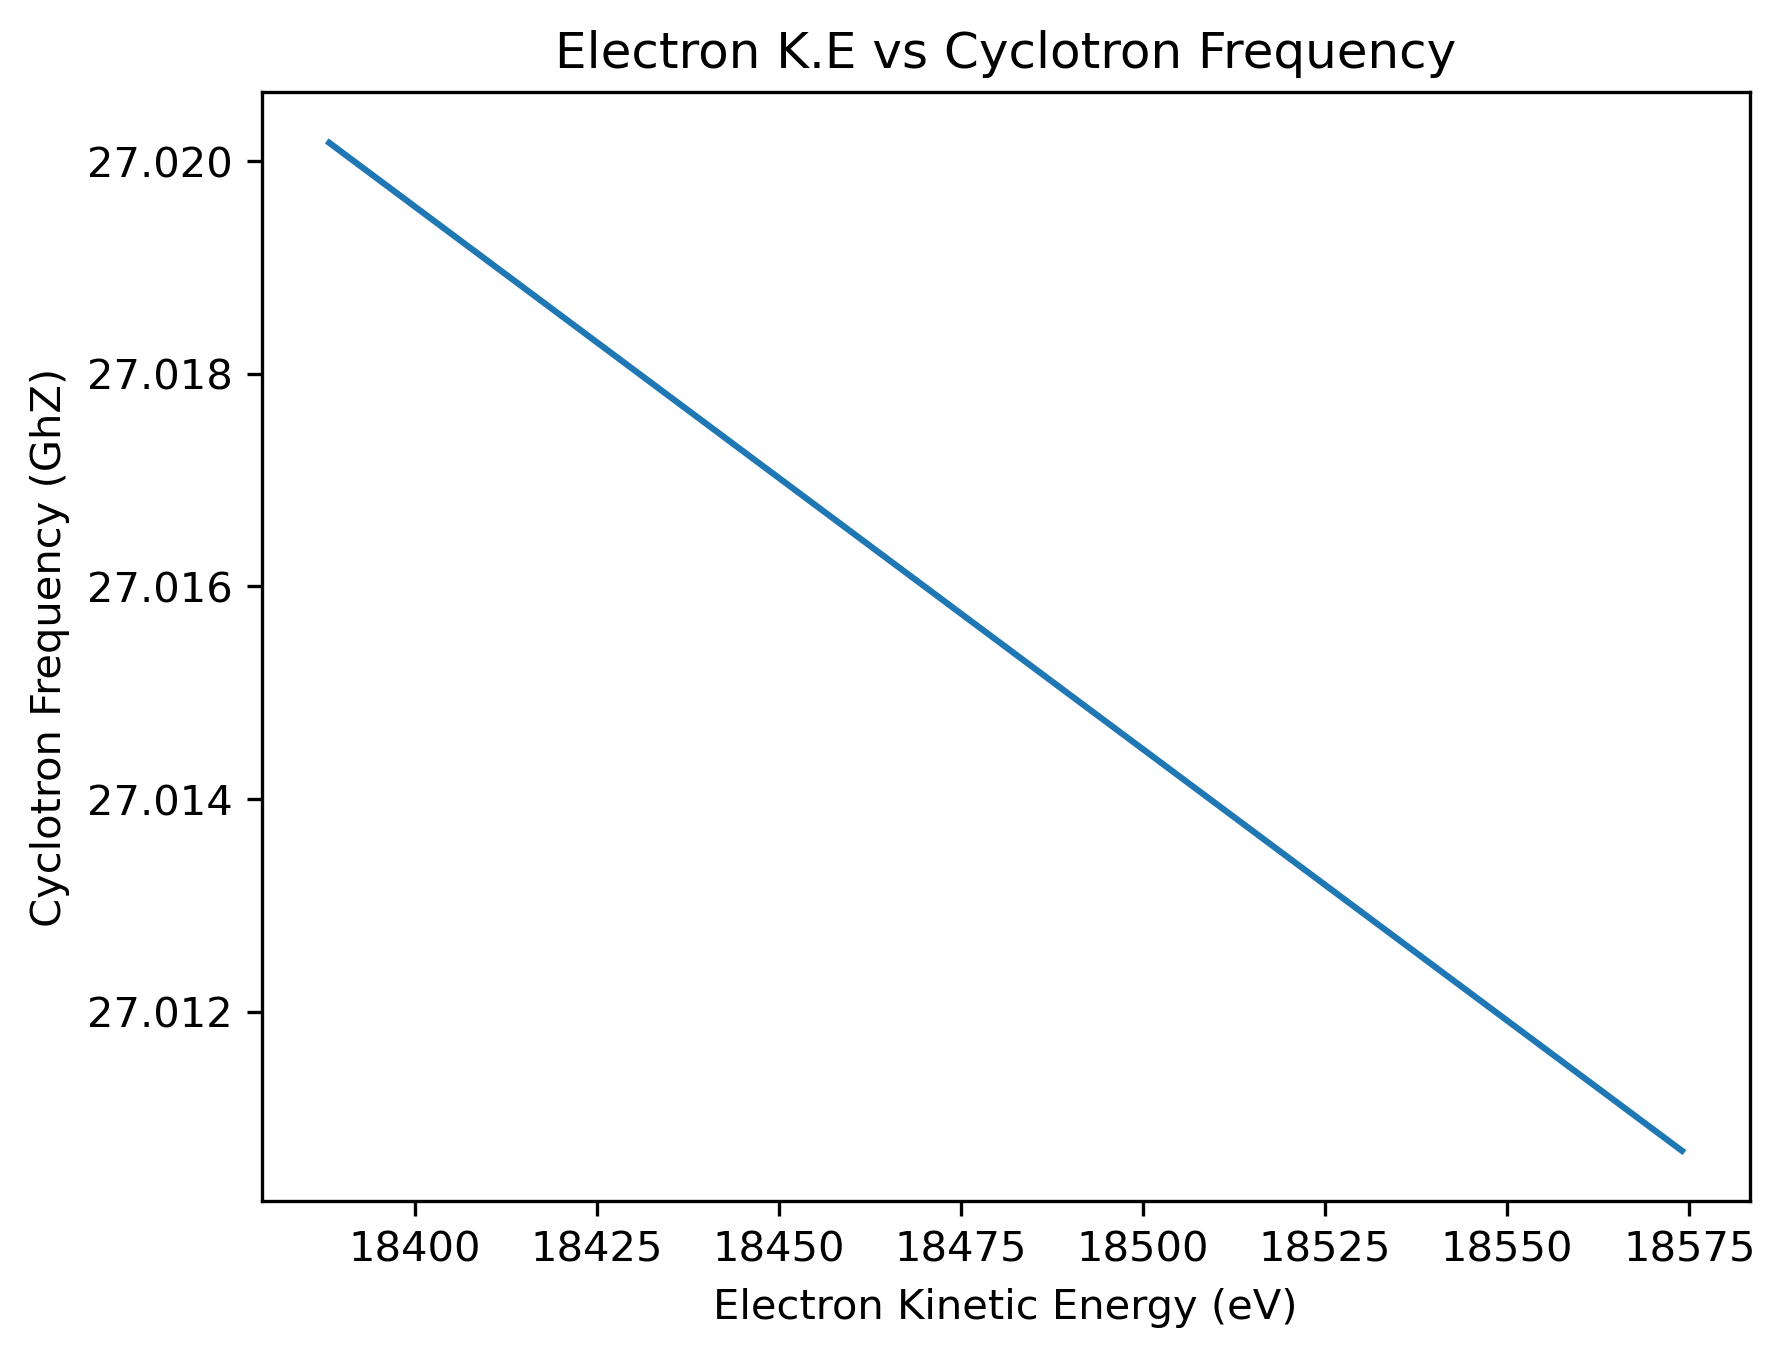

In [5]:
# Plot the cyclotron frequency near the end point
fig,ax = plt.subplots() 
tArray = np.linspace(0.99*T_end,T_end,100)  # 100 points from 0.9 *T_end to T_end in an numpy array
omegaArray= getCyclotronFreq(B,tArray) # Evaluate the cyclotron frequency for these energies
ax.plot(tArray/scipy.constants.e,omegaArray/1e9)  #Conversion to eV and GHz
ax.set_xlabel("Electron Kinetic Energy (eV)")
ax.set_ylabel("Cyclotron Frequency (GhZ)")
ax.set_title("Electron K.E vs Cyclotron Frequency")
print(omegaArray[-1])

#### Zooming right into the end point

27010694055.736893


Text(0.5, 1.0, 'Energy Difference to 18.574keV')

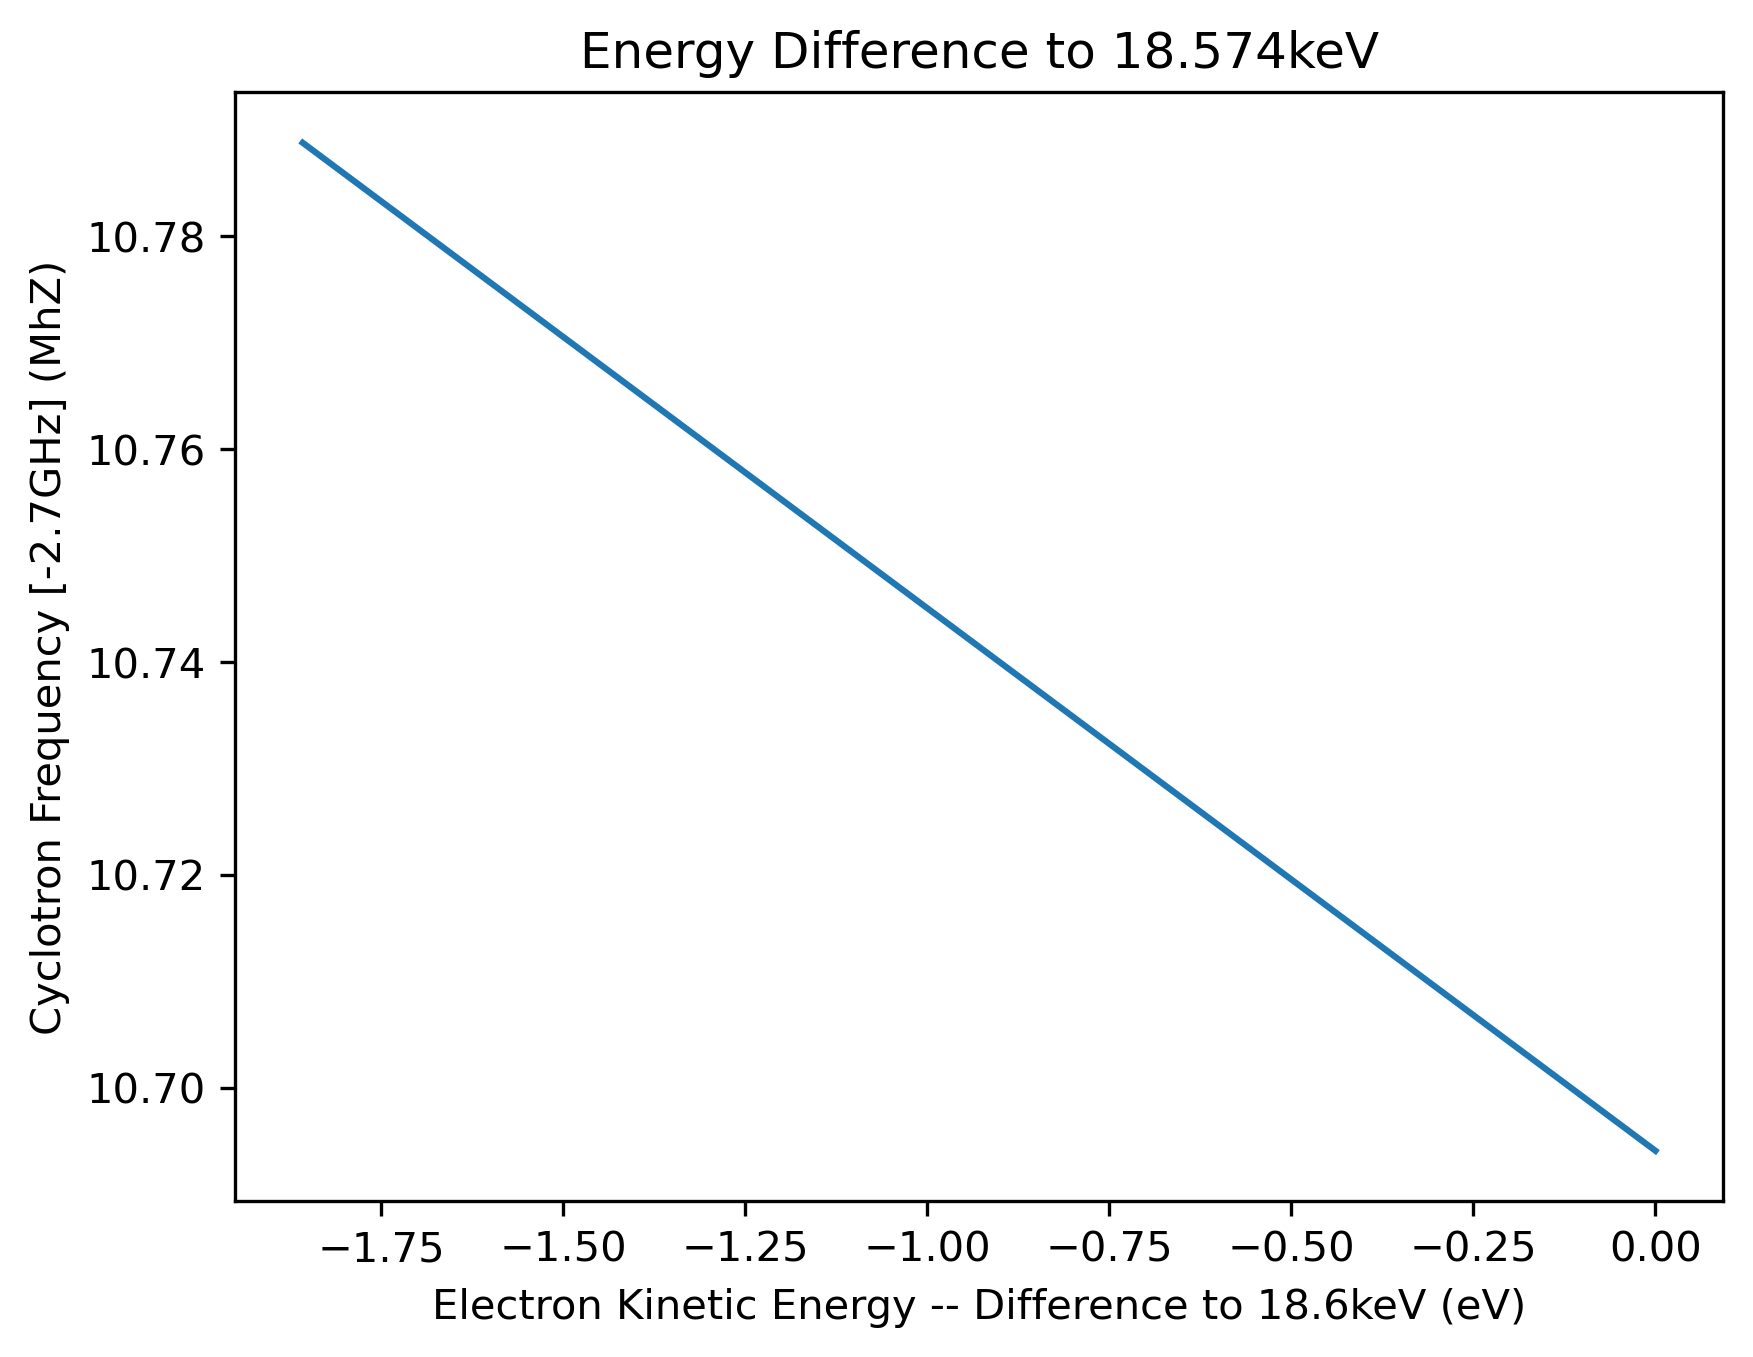

In [6]:
fOffset=27.0e9 #1T
#fOffset=27.0e8 #0.1T

fig,ax = plt.subplots()
tArray = np.linspace(0.9999*T_end,T_end,100)
omegaArray= getCyclotronFreq(B,tArray)
print(omegaArray[-1])
ax.plot((tArray/scipy.constants.e)-18.574e3,(omegaArray-27.0e9)/1e6)  #Conversion to eV and GHz
ax.set_xlabel("Electron Kinetic Energy -- Difference to 18.6keV (eV)")
ax.set_ylabel("Cyclotron Frequency [-2.7GHz] (MhZ)")
ax.set_title("Energy Difference to 18.574keV")
#_ = plt.xticks(rotation=60)


From this plot we see that the cyclotron frequency changes by $\Delta f \approx50$kHz per electron volt of kinetic energy. So we should keep that in mind for our goal frequency resolution.

The time scale associated with resolving that frequency difference is:
$$ T_{resolve} \approx \frac{1}{\Delta f} = 20 \mu\text{s}$$

## How long do we need to record a signal for to get energy resolution XXX?

There are a few paramters that might effect our energy resolution from a first principles perspective. Let's make our world simple and suppose we are just trying to record the frequency of a 27GHz sine wave.

Rather than investing in a 100Ghz digitiser (which doesn't exist as far as I know) we instead have to shift the frequency to a lower level.

### Aside: Mixer Theory

Suppose we have an RF signal which is at a fixed frequency, $\omega_0$:
$$ v_{RF} = A(t) \cos \left( \omega_0 t + \phi(t) \right) $$

We are going to mix with a local oscillator with frequency, $\omega_{LO}$
$$v_{LO} = A_{LO} \cos \left( \omega_{LO} t \right) $$

If we mix these together we get
$$v_{out} = v_{RF} \times v_{LO} $$
$$ v_{out} = A(t)A_{LO} \cos \left( \omega_0 t + \phi(t) \right) \cos \left( \omega_{LO} t \right) $$

Now remember
$$ \cos(A+B) = \cos A \cos B - \sin A \sin B $$
so
$$ \cos A \cos B = \frac{1}{2} \left[ \cos(A+B) + \cos (A-B) \right] $$

Therefore
$$  v_{out} = \frac{A(t)A_{LO}}{2} \left[ \cos \left( \omega_0 t + \phi(t) + \omega_{LO} t \right) + \cos \left( \omega_0 t + \phi(t) - \omega_{LO} t \right) \right] $$
$$ v_{out} = \frac{A(t)A_{LO}}{2} \left[ \cos \left( (\omega_0 +\omega_{LO}) t + \phi(t)\right) + \cos \left( (\omega_0 -\omega_{LO}) t + \phi(t)\right) \right] $$

The signal is mixed to $f_{LO}+f_{RF}$ and $f_{LO}-f_{RF}$. Now we have to be careful about which local oscillator frequency we choose and realise that $f_{RF}=f_{LO} \pm f_{IF}$ and $f_{IM}=f_{LO} \mp f_{IF}$ both end up at $f_{IF}$ 

Just for the sake of argument lets pick our mixing frequency to be 26.5GHz and lets operate our system with a low pass filter that gets rid of the high-frequency band of the mixer.

So our mixed signal will be
$$ v_{out} = \frac{A(t)A_{LO}}{2}  \cos \left( (\omega_0 -\omega_{LO}) t + \phi(t)\right) $$

## Best case scenario $A(t)=A$ and $\phi(t)=\phi$ 
The best case scenario is the one where the amplitude and phase are constant so then we can investigate how does our frequency resolution depend on observation time.

The only other variable is the sampling rate.

So we will look at $f_{centre}=9.36$MHz and a frequency change of $\Delta f=50kHz$. The conclusion will be that (for sampling rates above Nyquist (of the centre frequency) our frequency resolving resolution does not depend on sampling rates. It only depends on the resolving time. 

Sampling rate: 999999999.9999999 Hz
Time between samples: 1e-09 s
Number of samples: 20000
Signal duration 2e-05 s


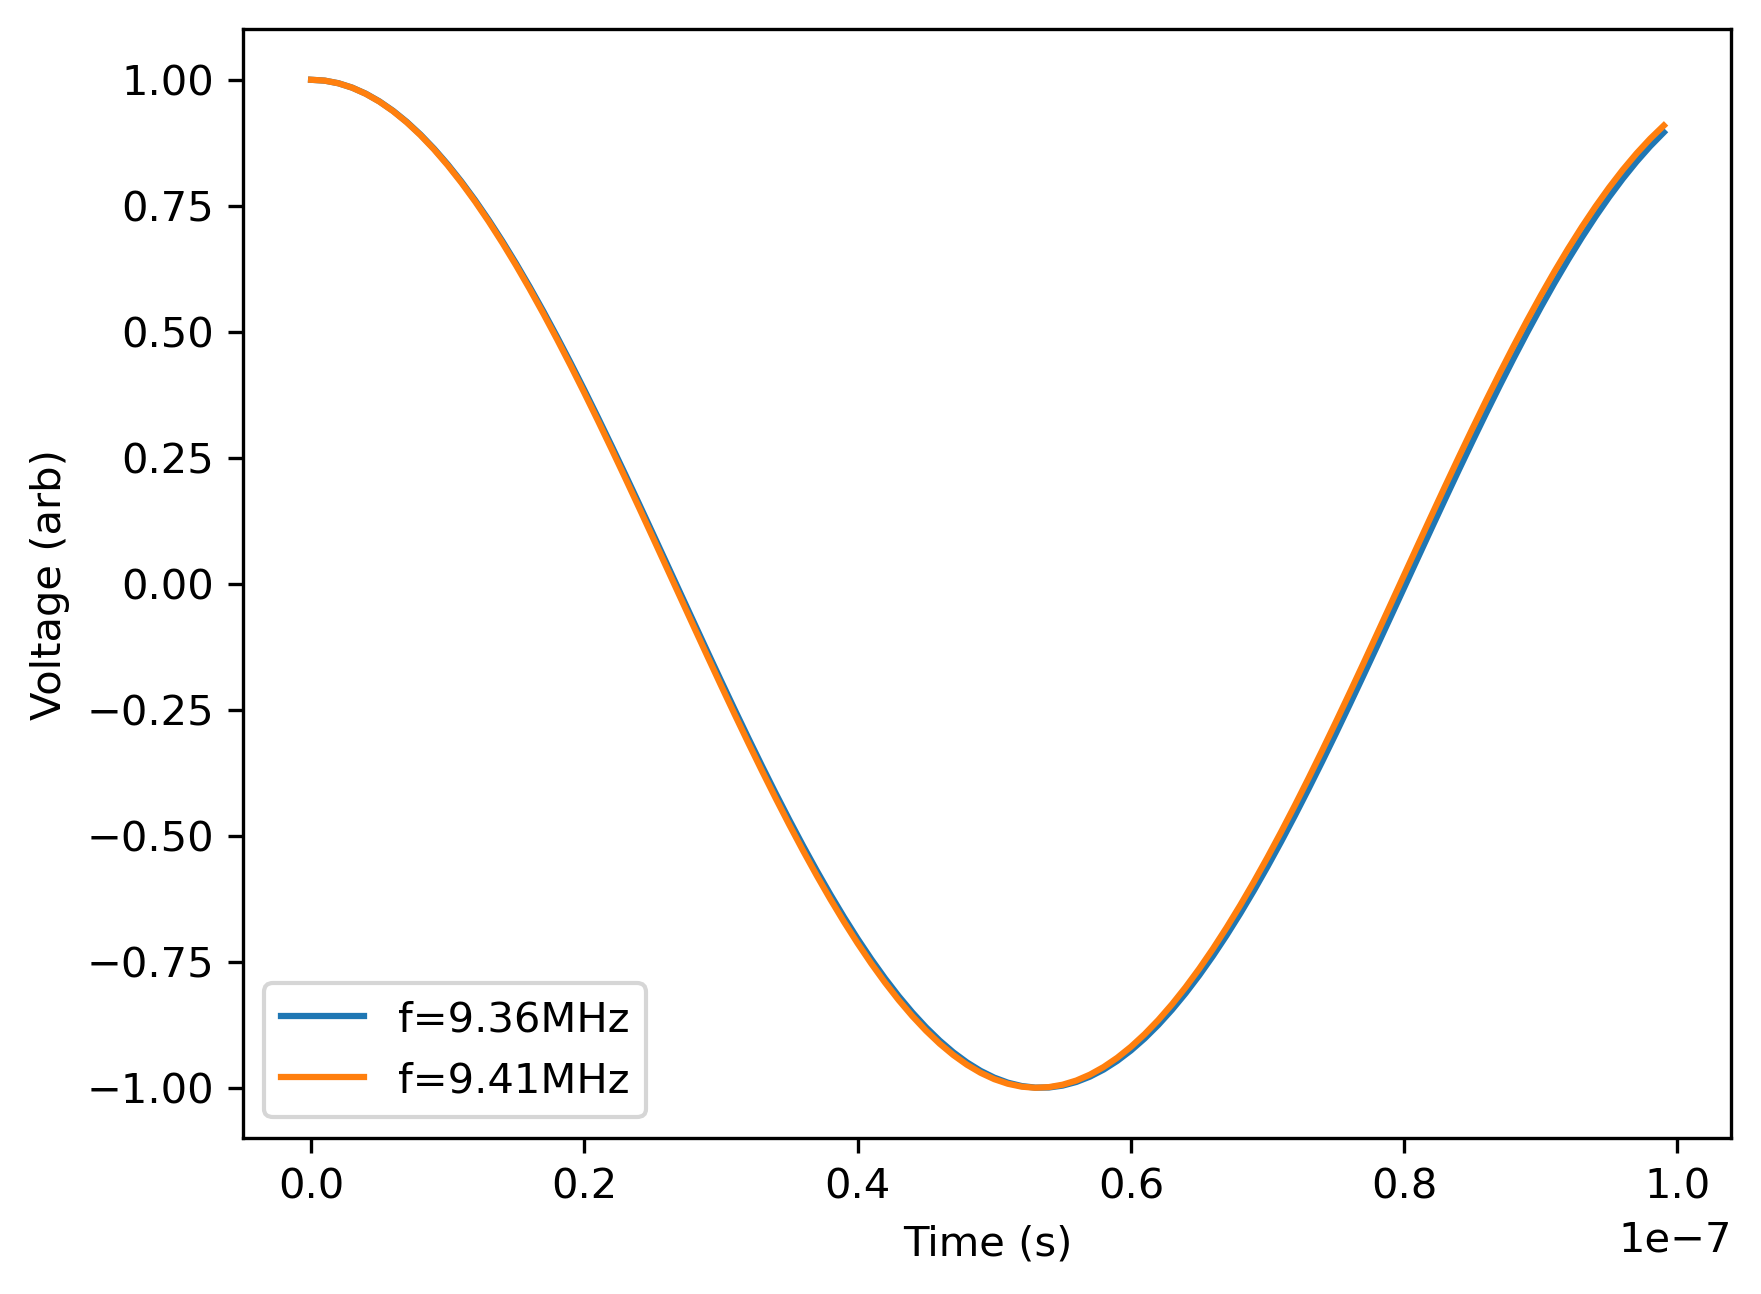

In [7]:
def getV(t,w,A,phi):
    """Function to return a simple cosine 

    Args:
        t: The array of times
        w: The angular frequency
        A: The amplitude
        phi: The phase at t=0
 
     Returns:
        The cosine values as an array

    """
    return A*np.cos((w*t)+phi)

#Define the centre frequency and deltaf we need to measure
centref=9.36e6
deltaf=50e3
t_res=1./deltaf  #Our resolving time
dt=1e-9 #Our time between samples (1./sampling rate)

duration=t_res*1  #The time we will take as signal duration
#If duration >= t_res we can resolve deltaf, otherwise we can not

N=int(duration/dt)
w=2*np.pi*(centref) #60.46 MHz
w2=2*np.pi*(centref+deltaf) #60.51 MHz
A=1 #for simplicity
phi=0 # for simplicity
sr=1./dt

print("Sampling rate:",sr,"Hz")
print("Time between samples:",dt,"s")
print("Number of samples:",N)
print("Signal duration",duration,"s")


t=np.linspace(0,dt*N,N)
v=getV(t,w,A,phi)
v2=getV(t,w2,A,phi)

fig,ax = plt.subplots()
ax.plot(t[0:100],v[0:100],label="f="+str(w/(2*np.pi)/1e6)+"MHz")
ax.plot(t[0:100],v2[0:100],label="f="+str(w2/(2*np.pi)/1e6)+"MHz")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (arb)")
ax.legend()


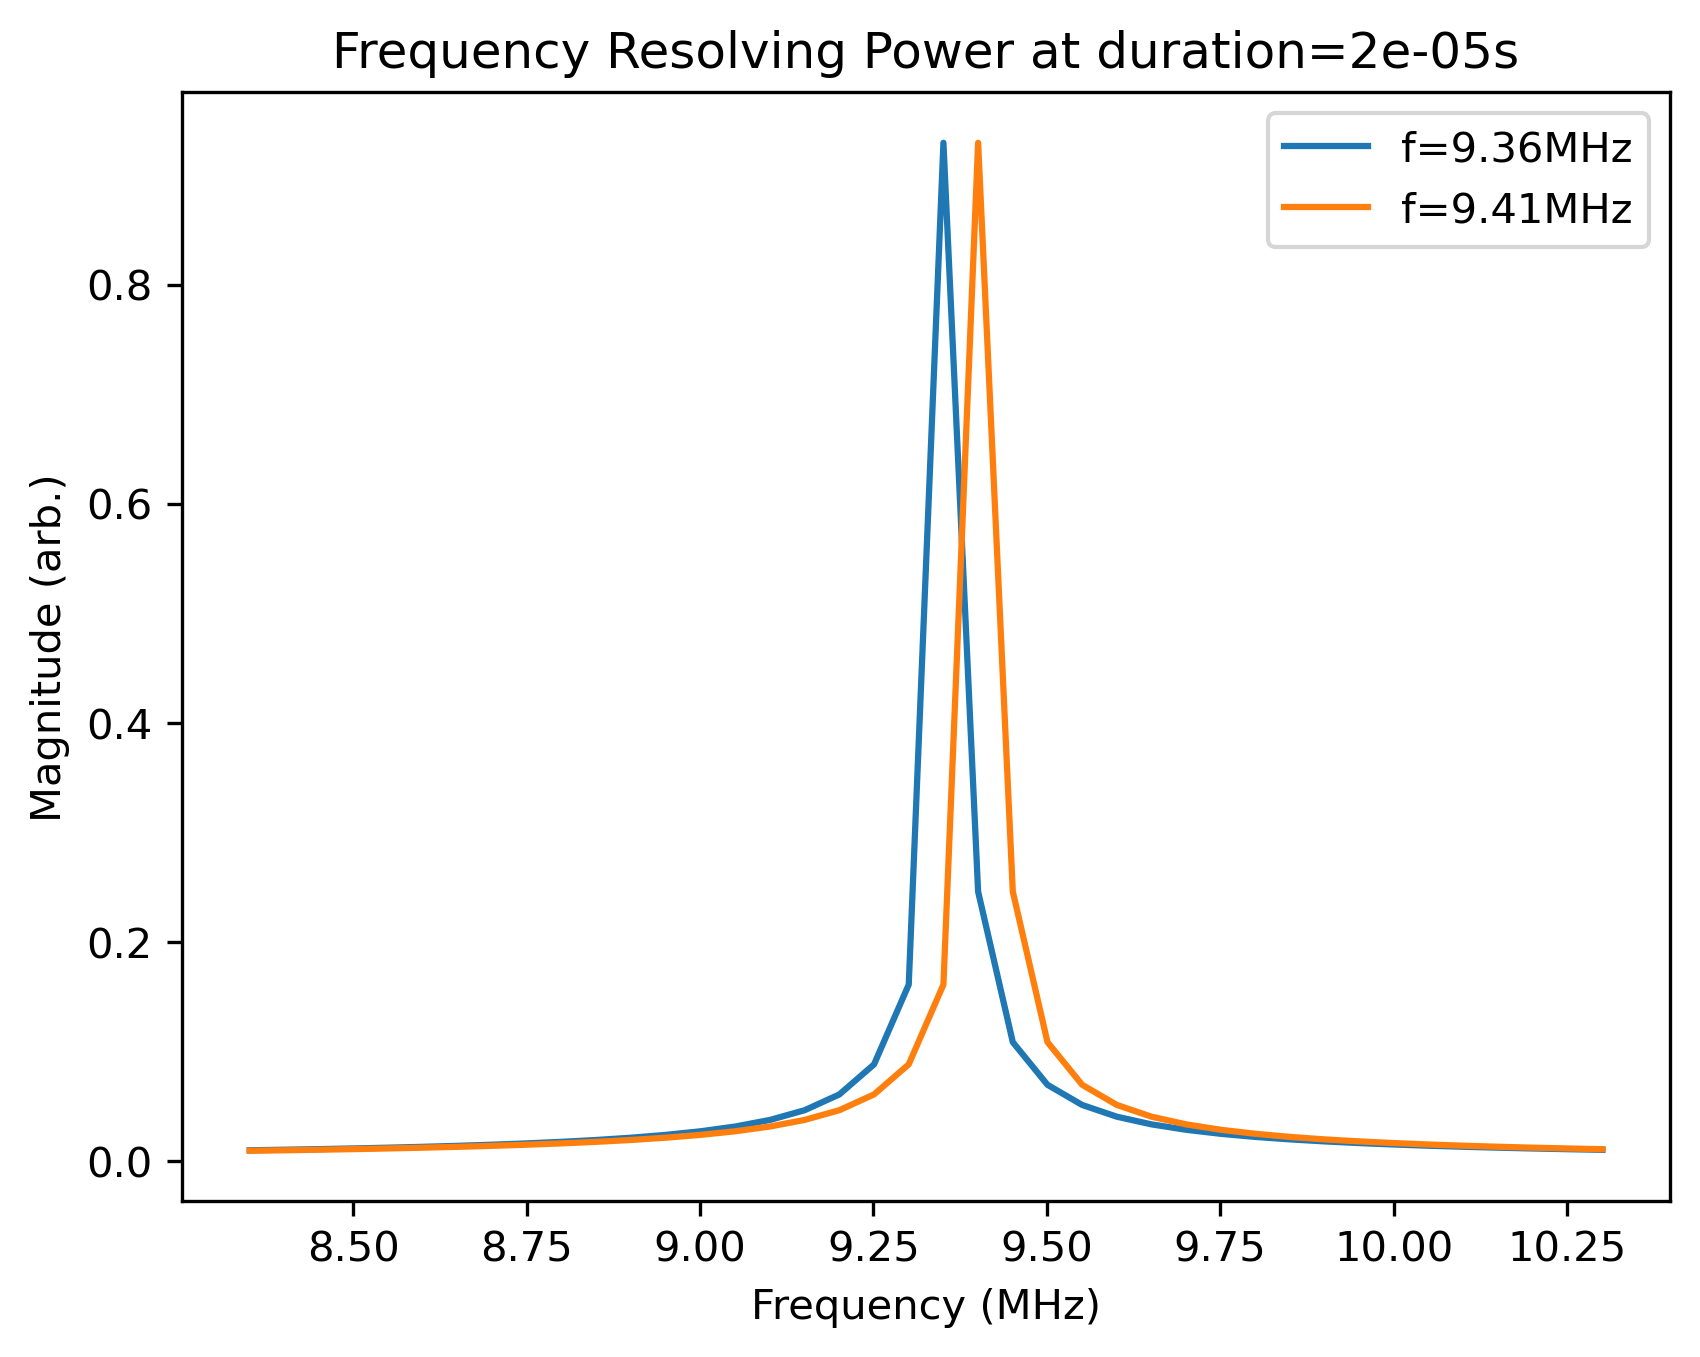

In [8]:
def convertToMag(yf):
    """Function to convert the result of an fft to magnitude

    Args:
        yf: The array of complex numbers from the fft (this will be both the positive and negative frequencies)
 
     Returns:
        The array of magnitudes (of length N/2) where N is the length of yf

    """
    N=yf.shape[0] #The length of yf
    return 2.0/N * np.abs(yf[0:N//2])  # The 2/N is a normalisation

from scipy.fft import fft, ifft  # Import the fft and inverse fft functions
yf = fft(v) #FFT of v
yf2 = fft(v2) #FFT of v2
df=1/(N*dt)  # Frequency spacing
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2)  #The N/2 frequency values from 0 to 1/(2*dt)

#Plot the frequency around the centre frequency bin
fig,ax = plt.subplots()
fbin=int(centref/df)
ax.plot((xf/1e6)[fbin-20:fbin+20],convertToMag(yf)[fbin-20:fbin+20],label="f="+str(w/(2*np.pi)/1e6)+"MHz") #1e6 to convert to MHz
ax.plot((xf/1e6)[fbin-20:fbin+20],convertToMag(yf2)[fbin-20:fbin+20],label="f="+str(w2/(2*np.pi)/1e6)+"MHz")  #1e6 to convert to MHz
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Magnitude (arb.)")
ax.set_title("Frequency Resolving Power at duration="+str(duration)+"s")
ax.legend()


In [9]:
print((xf[1]-xf[0])/1e6)
print(df/1e6)

0.05000500050005
0.049999999999999996


## Which magnetic field should we run at?

 Obviously as we change the field since the frequency is proportional to the field the frequency of the end point just increases linearly with field. So we have a cyclotron frequency at the 18.6keV end point of
 * 27GHz @ 1T
 * 2.7GHz @ 0.1T


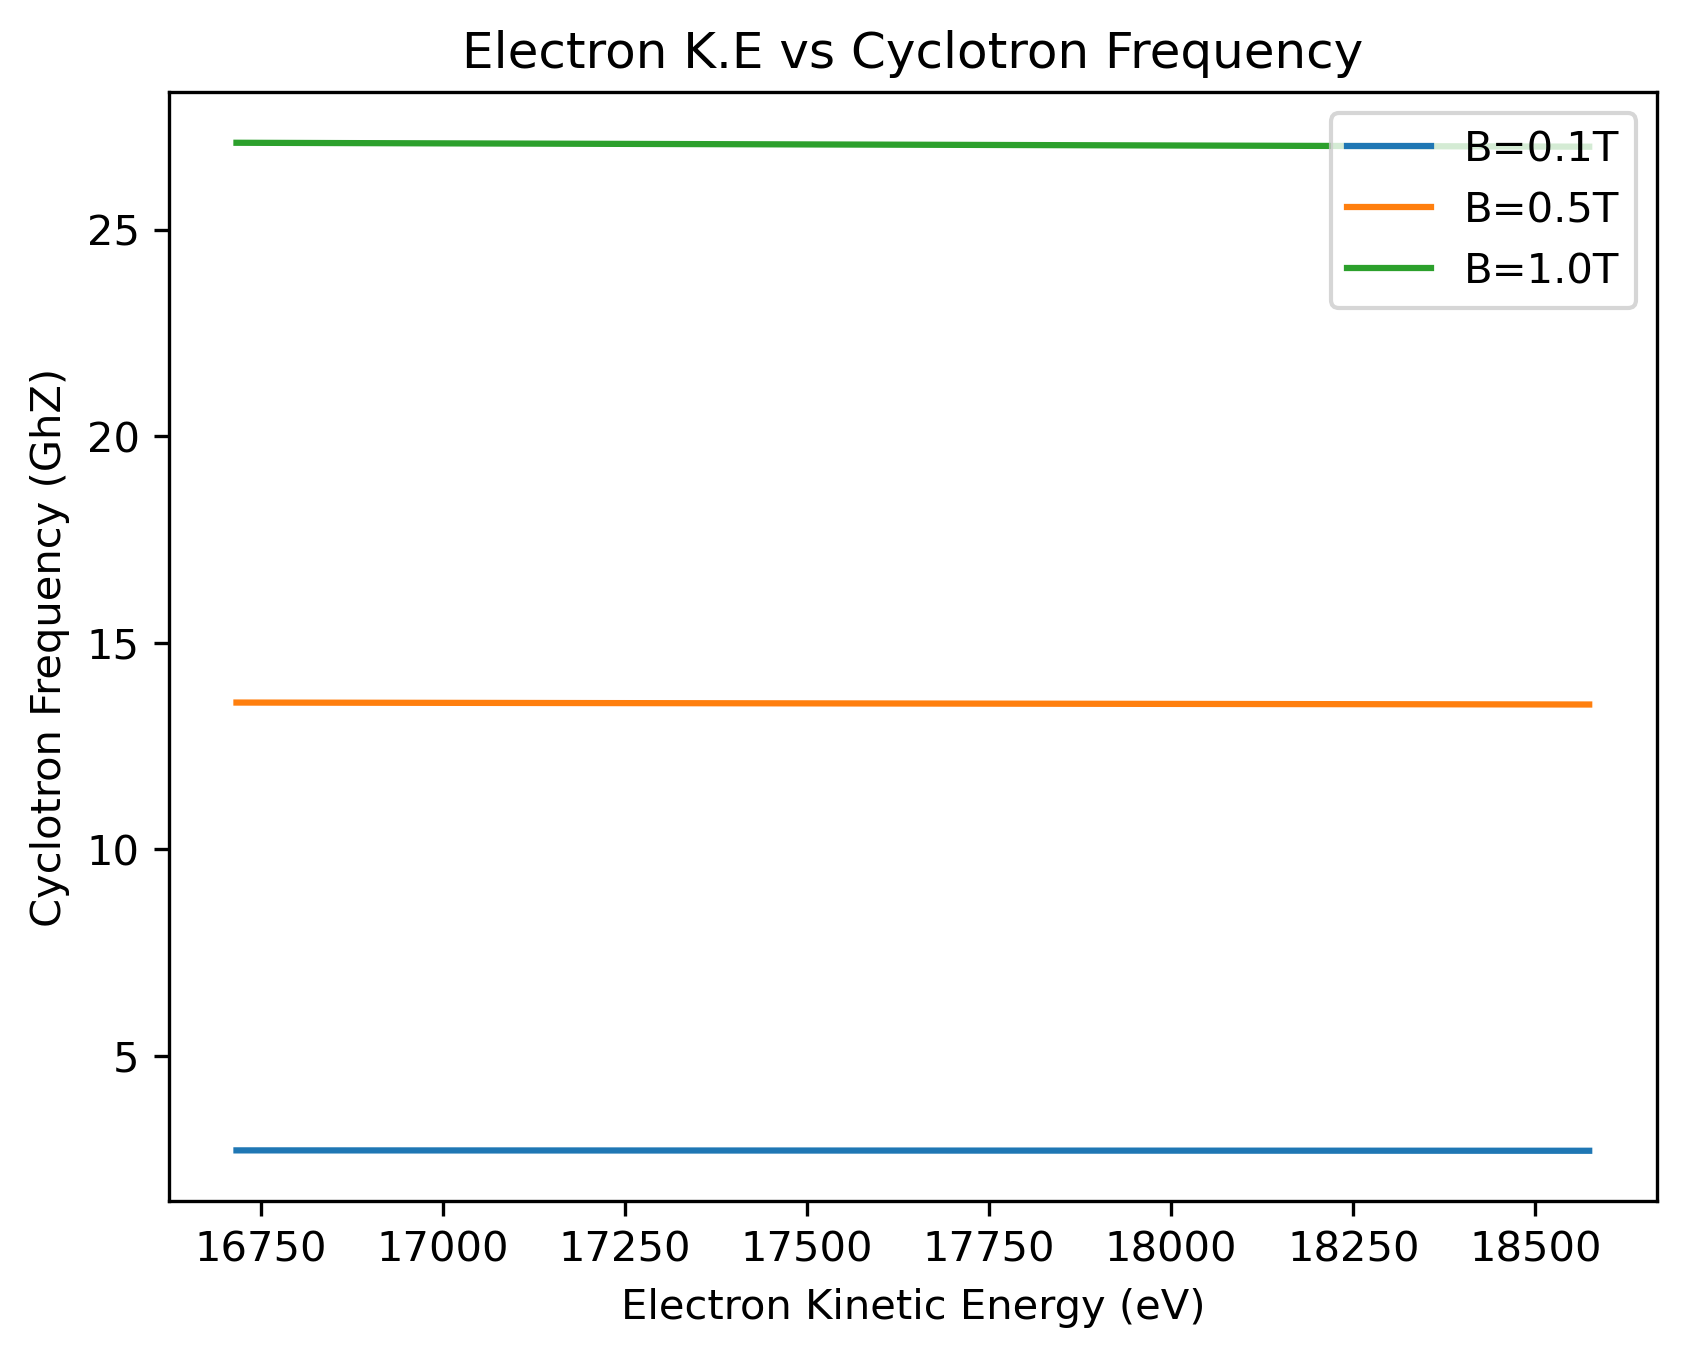

In [10]:
# Plot the cyclotron frequency near the end point
fig,ax = plt.subplots() 
tArray = np.linspace(0.9*T_end,T_end,100)  # 100 points from 0.9 *T_end to T_end in an numpy array
for B in [0.1,0.5,1.0]:
    omegaArray= getCyclotronFreq(B,tArray) # Evaluate the cyclotron frequency for these energies
    ax.plot(tArray/scipy.constants.e,omegaArray/1e9,label="B="+str(B)+"T")  #Conversion to eV and GHz
ax.set_xlabel("Electron Kinetic Energy (eV)")
ax.set_ylabel("Cyclotron Frequency (GhZ)")
ax.set_title("Electron K.E vs Cyclotron Frequency")
ax.legend()

## Frequency difference
But of course we don't care about the absolute frequency so much (well we do when we are constructing antennas or waveguides) the energy resolution is going to be determined by our ability to resolve frequency. So instead of plotting the abolute frequency vs electron kinetic energy we can instead plot the frequency difference vs energy difference to the 18.6keV end point.

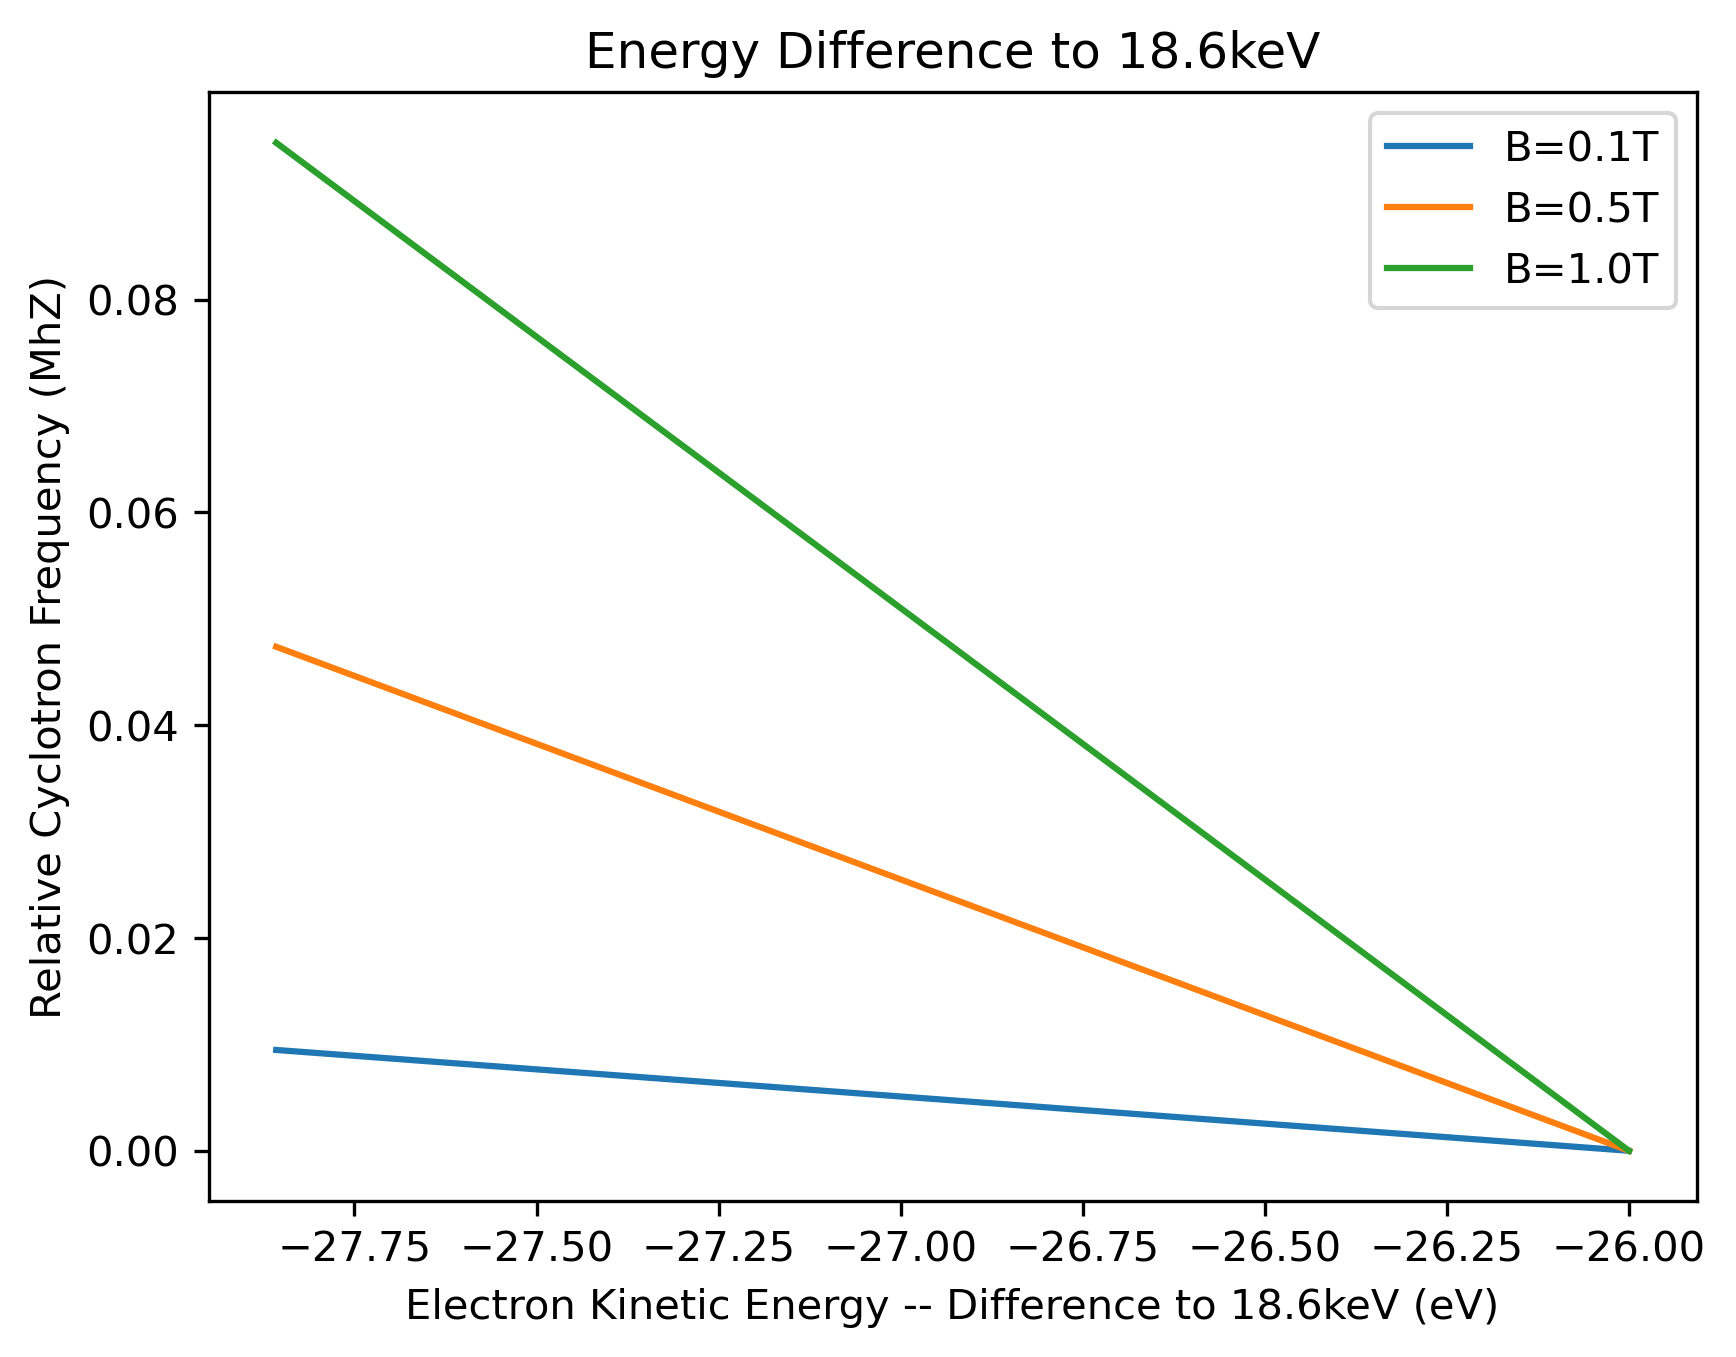

In [11]:
fig,ax = plt.subplots()
tArray = np.linspace(0.9999*T_end,T_end,100)
for B in [0.1,0.5,1.0]:
    omegaArray= getCyclotronFreq(B,tArray)
    lastOmega=omegaArray[-1]
    ax.plot((tArray/scipy.constants.e)-18.6e3,(omegaArray-lastOmega)/1e6,label="B="+str(B)+"T")  #Conversion to eV and GHz
ax.set_xlabel("Electron Kinetic Energy -- Difference to 18.6keV (eV)")
ax.set_ylabel("Relative Cyclotron Frequency (MhZ)")
ax.set_title("Energy Difference to 18.6keV")
ax.legend()
#print(tArray[-1]/scipy.constants.e,(tArray[-1]-tArray[-54])/scipy.constants.e)

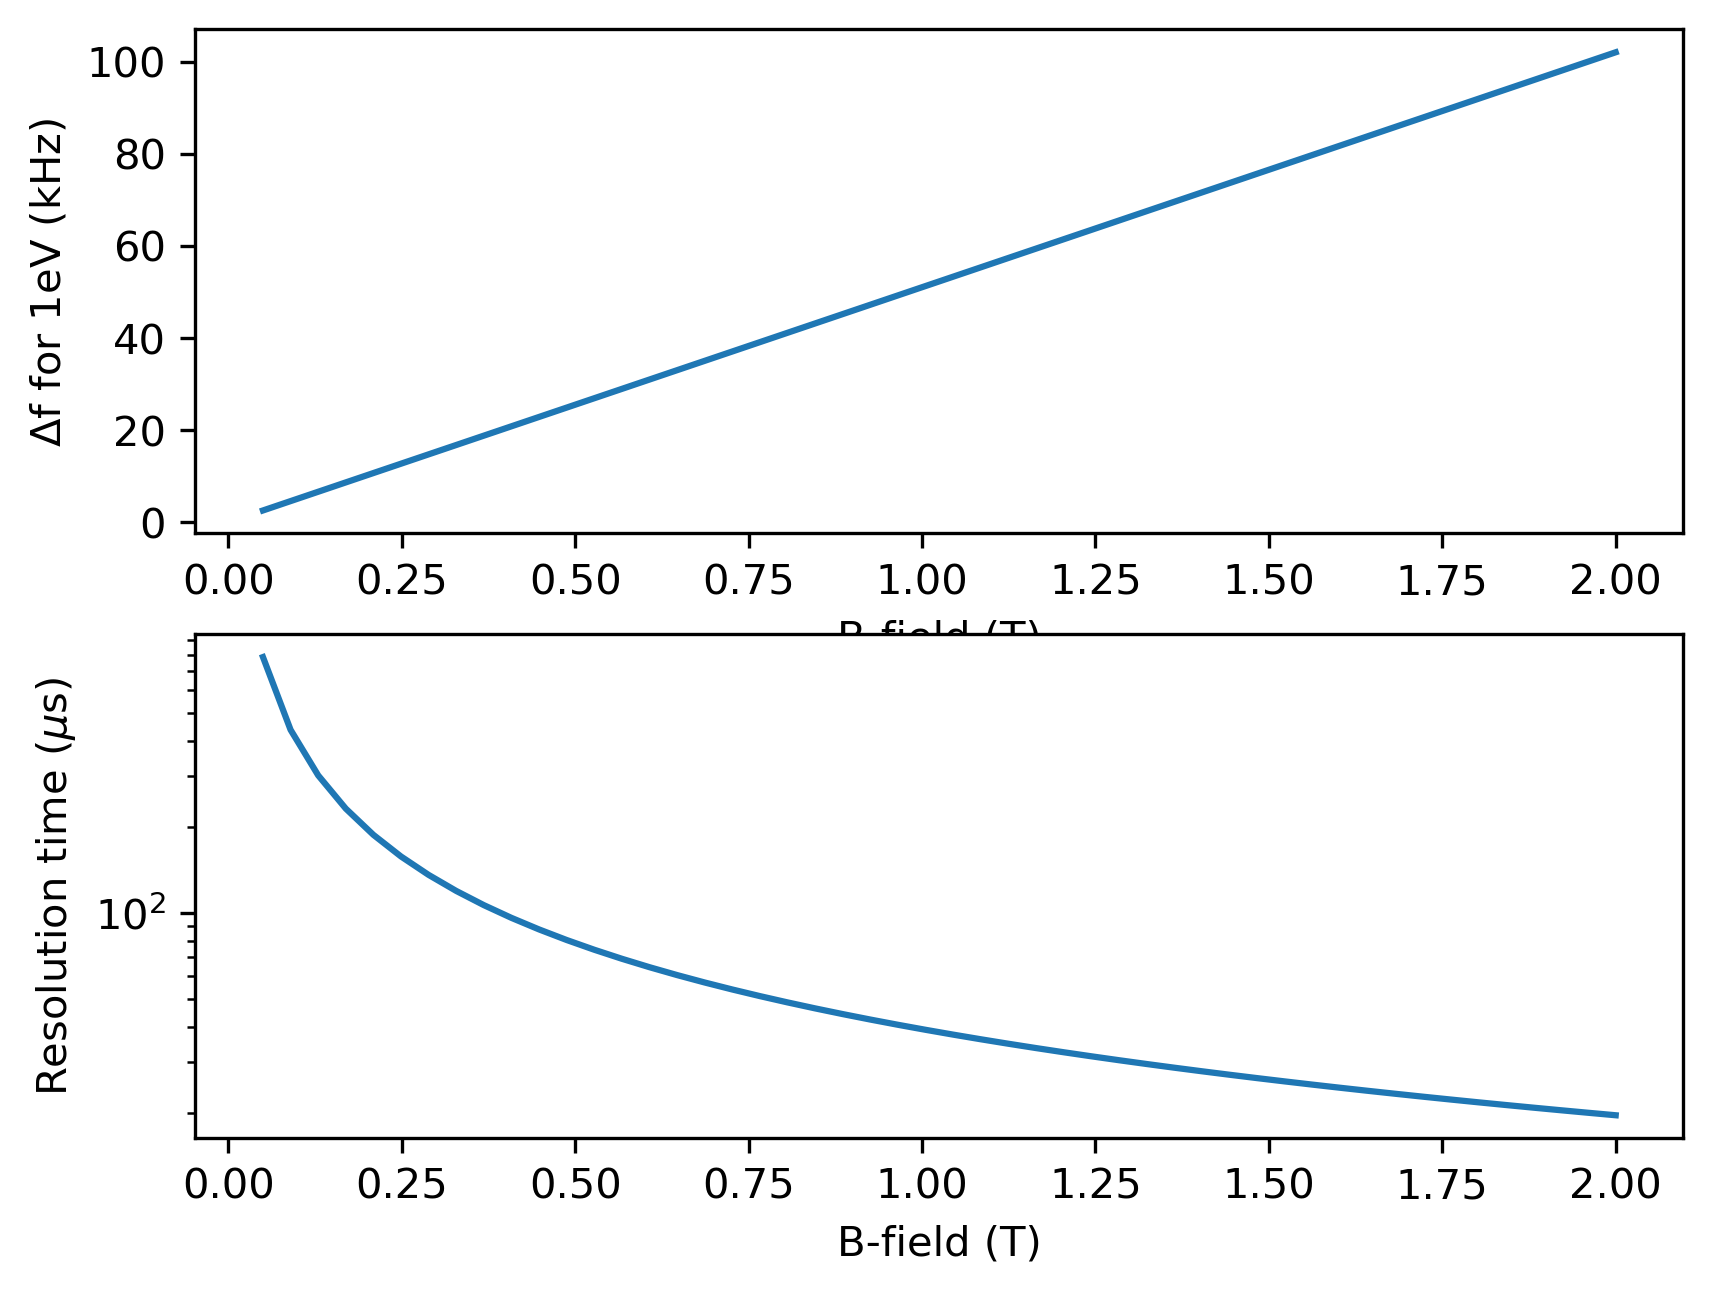

In [12]:
fig,ax = plt.subplots(2,1)
numBs=50
tArray=np.array([T_end-scipy.constants.e,T_end])
tArray2d=np.tile(tArray,(numBs,1))
bArray=np.linspace(0.05,2,numBs)
bArray2d=np.tile(bArray,(2,1))
omegaArray=np.array(getCyclotronFreq(bArray2d,tArray2d.T))
ax[0].plot(bArray,(omegaArray[0,:]-omegaArray[1,:])/1e3)
ax[0].set_xlabel("B-field (T)")
ax[0].set_ylabel("$\Delta$f for 1eV (kHz)")
ax[1].plot(bArray,2e6/(omegaArray[0,:]-omegaArray[1,:]))
ax[1].set_xlabel("B-field (T)")
ax[1].set_ylabel("Resolution time ($\mu$s)")
ax[1].set_yscale("log")


Text(0, 0.5, 'End point frequency (GHz)')

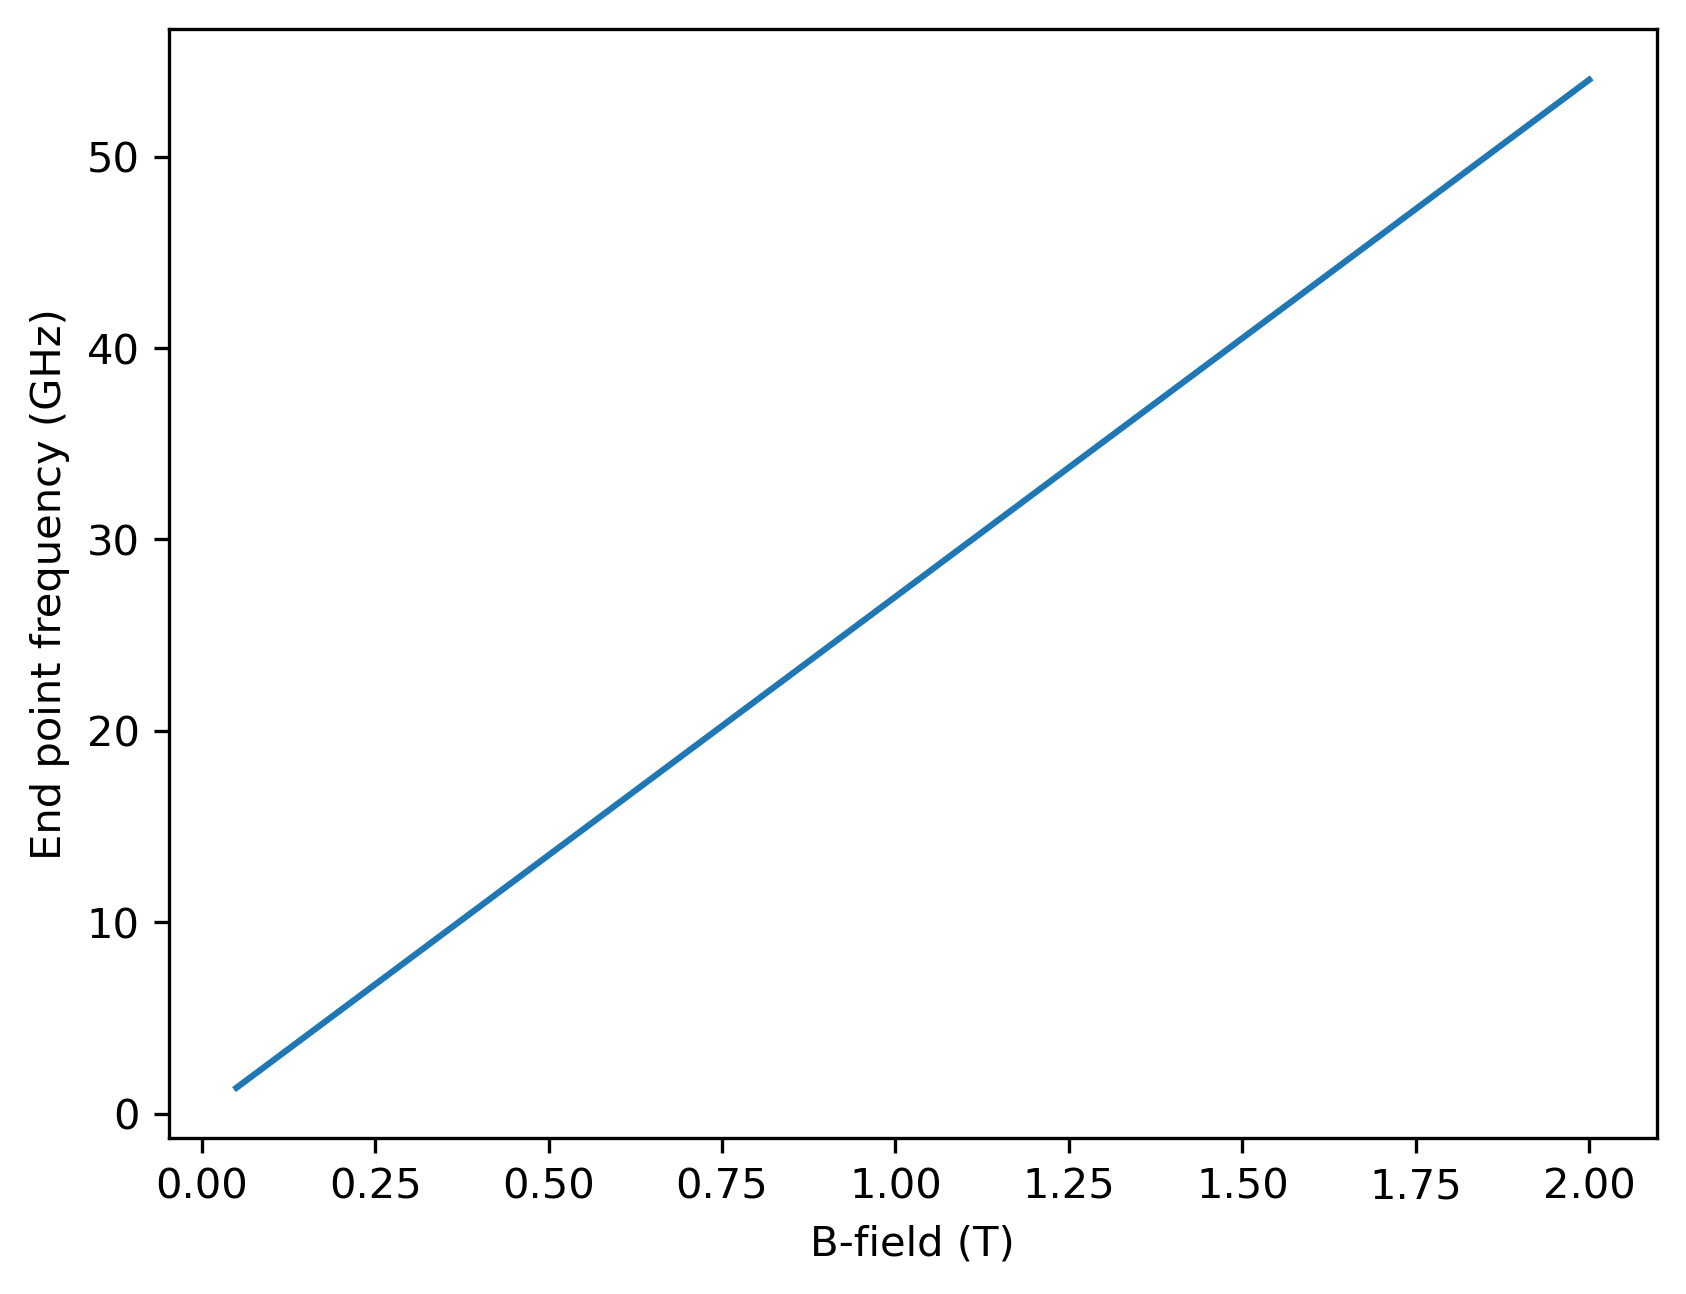

In [13]:

numBs=50
bArray=np.linspace(0.05,2,numBs)
omegaArray=np.array(getCyclotronFreq(bArray,T_end))
fig,ax = plt.subplots() 
ax.plot(bArray,omegaArray/1e9)
ax.set_xlabel("B-field (T)")
ax.set_ylabel("End point frequency (GHz)")


Text(0, 0.5, 'End point Wavelength (m)')

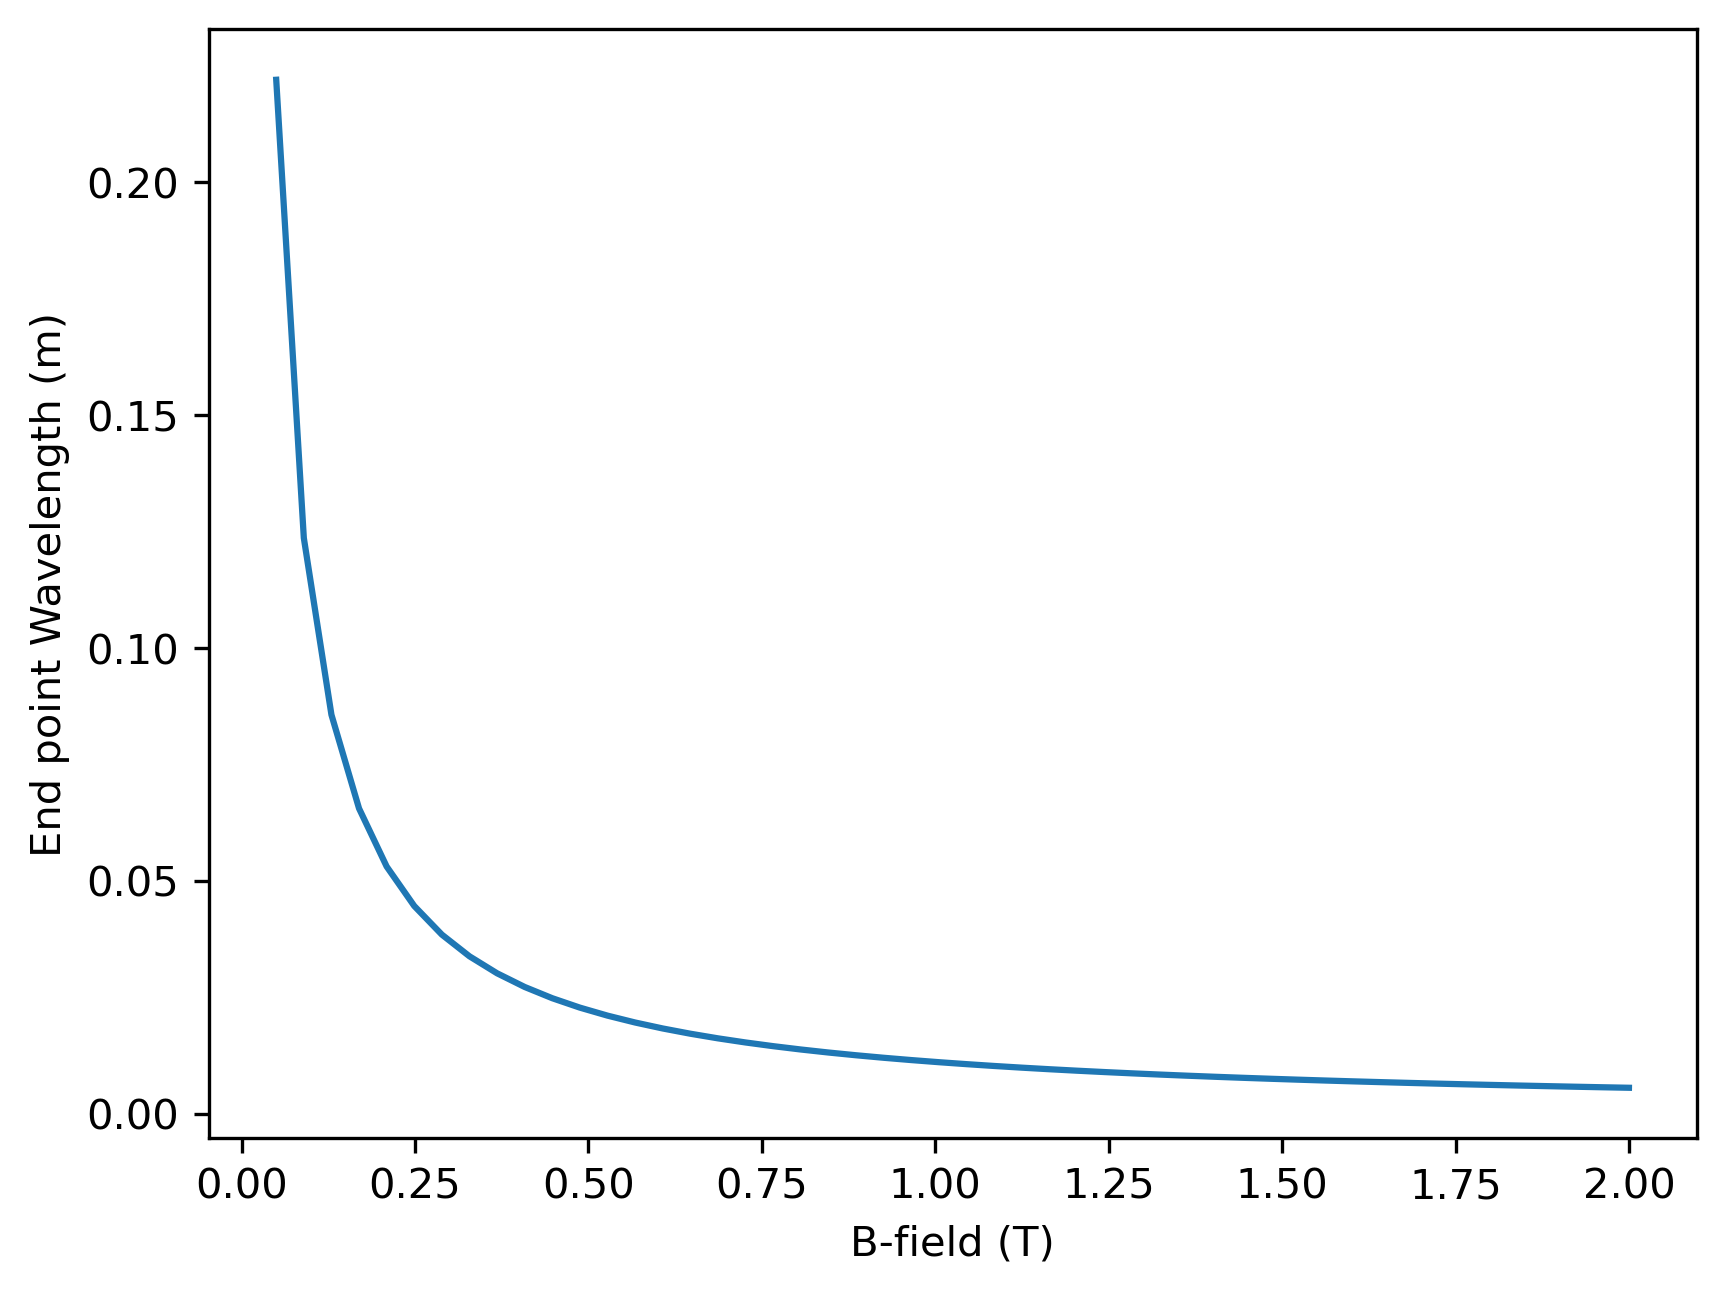

In [14]:

numBs=50
bArray=np.linspace(0.05,2,numBs)
omegaArray=np.array(getCyclotronFreq(bArray,T_end))
fig,ax = plt.subplots() 
ax.plot(bArray,scipy.constants.c/omegaArray)
ax.set_xlabel("B-field (T)")
ax.set_ylabel("End point Wavelength (m)")



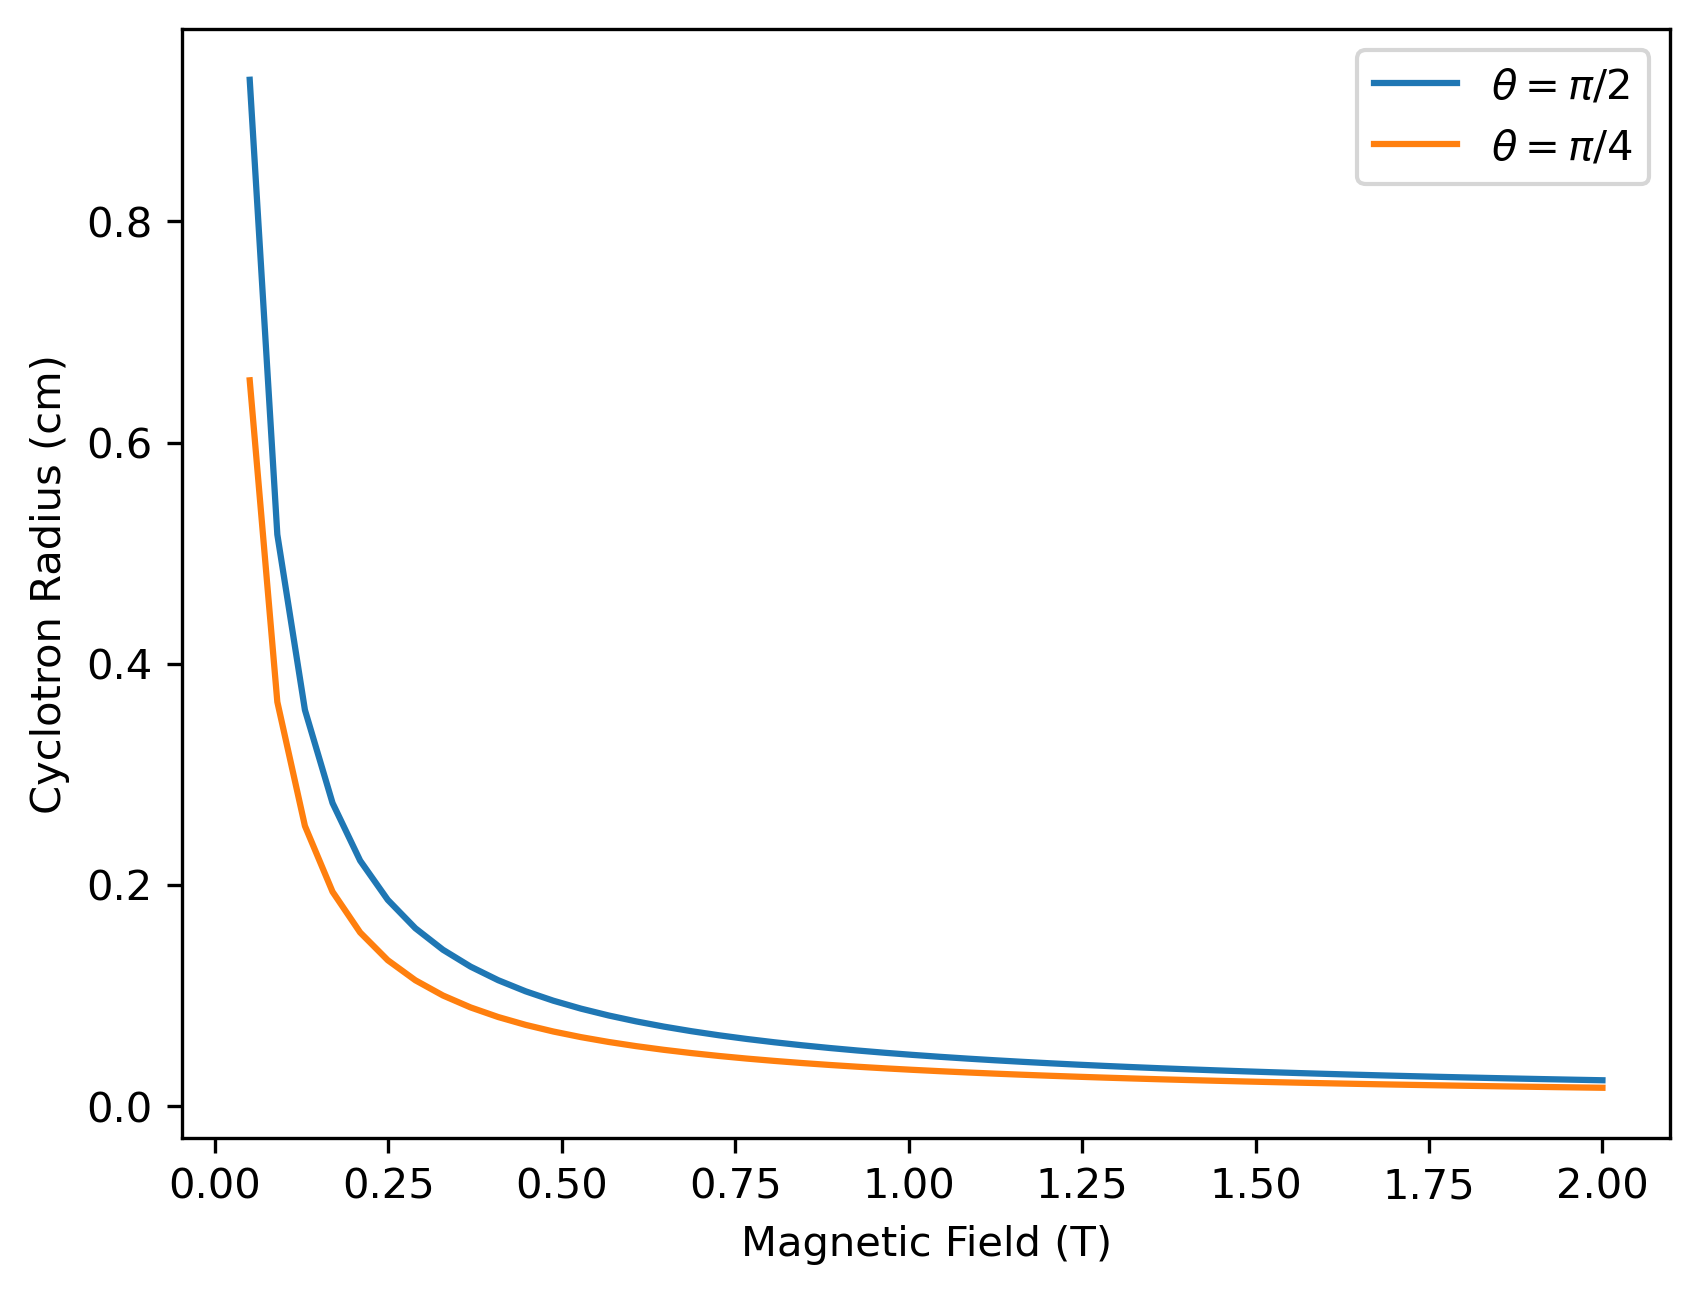

In [15]:
fig,ax = plt.subplots()
numBs=50
bArray=np.linspace(0.05,2,numBs)
ax.plot(bArray,getCyclotronRadius(bArray,18.6,math.pi/2.),label=r"$\theta=\pi/2$")
ax.plot(bArray,getCyclotronRadius(bArray,18.6,math.pi/4.),label=r"$\theta=\pi/4$")
ax.set_xlabel("Magnetic Field (T)")
ax.set_ylabel("Cyclotron Radius (cm)")
ax.legend()

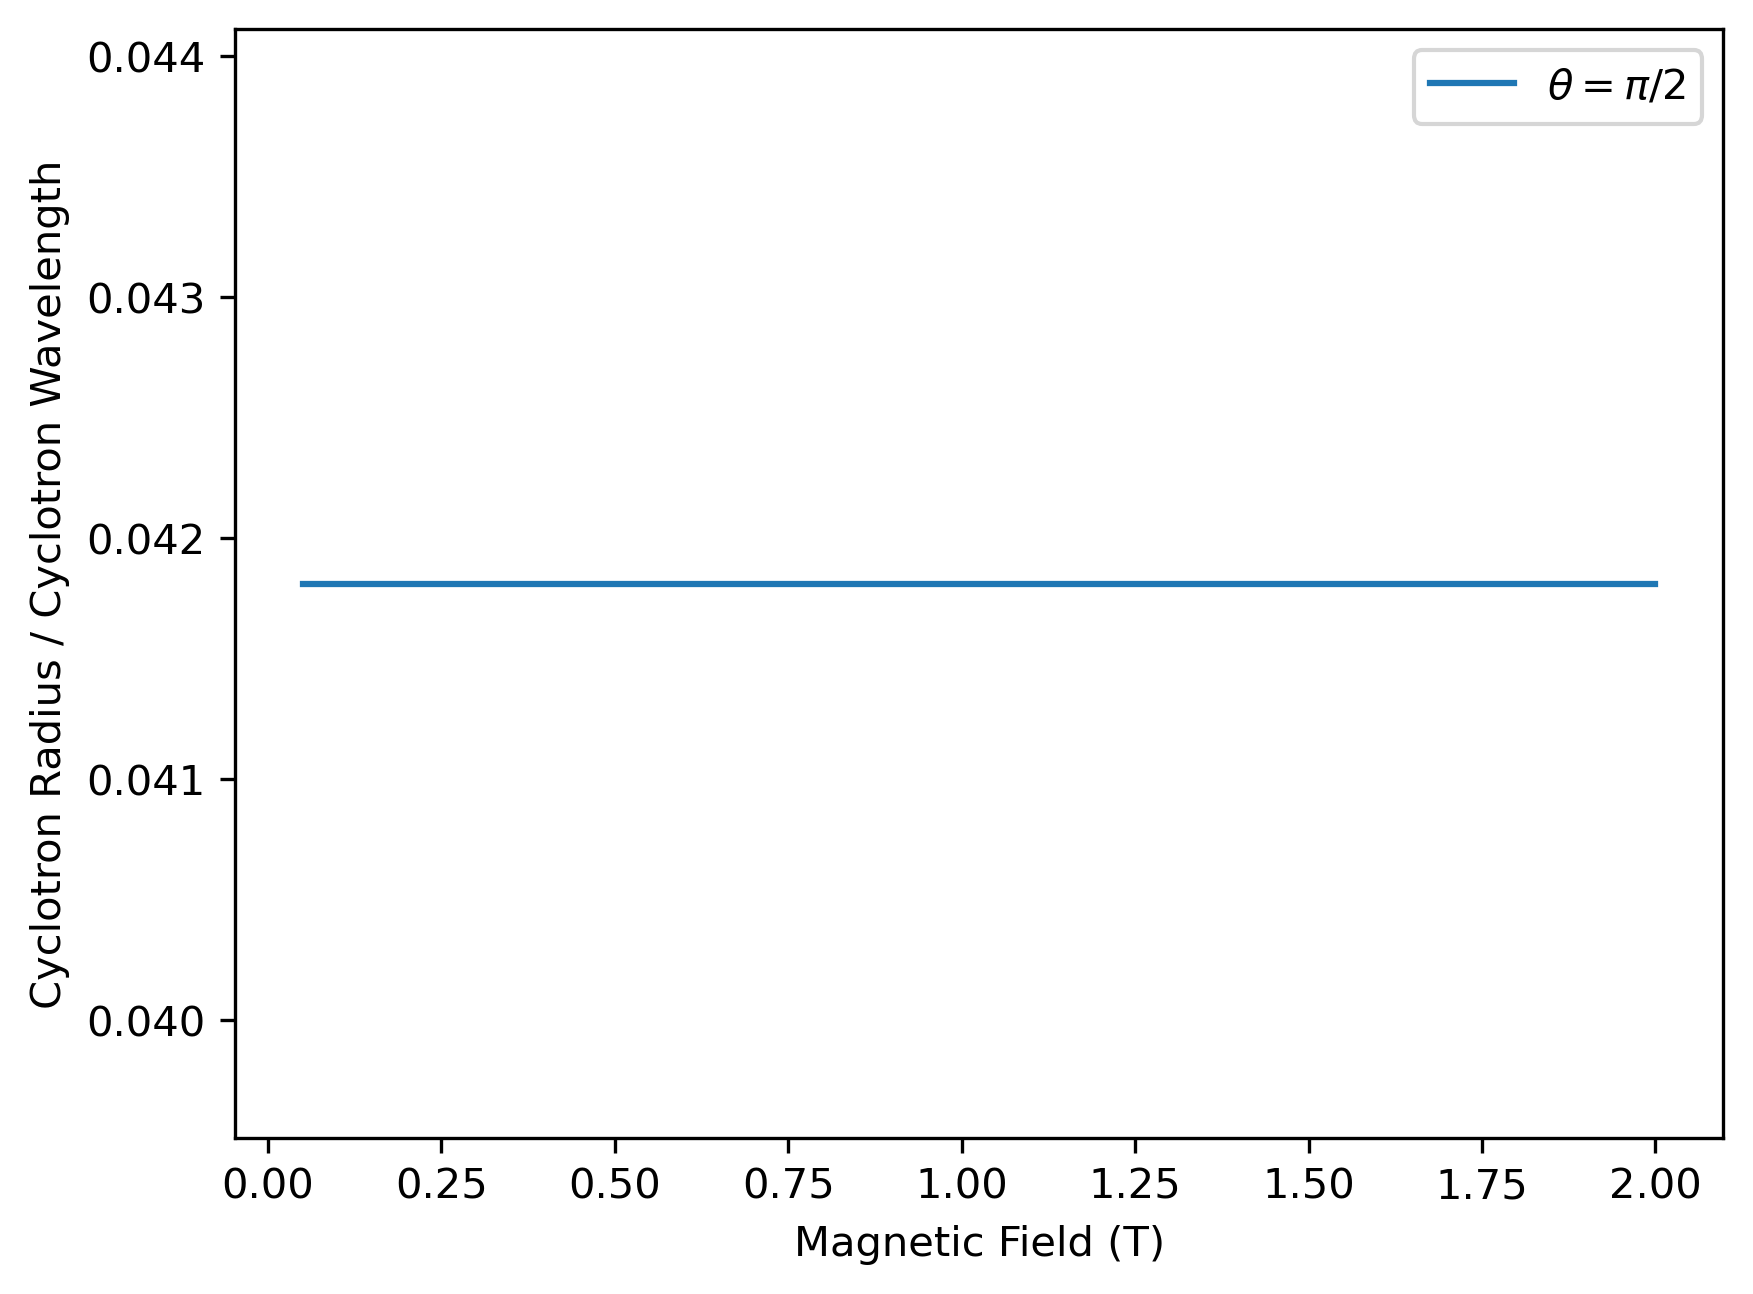

In [16]:
fig,ax = plt.subplots()
numBs=50
bArray=np.linspace(0.05,2,numBs)
omegaArray=np.array(getCyclotronFreq(bArray,T_end))
ax.plot(bArray,1e-2*getCyclotronRadius(bArray,18.6,math.pi/2.)/(scipy.constants.c/omegaArray),label=r"$\theta=\pi/2$")
ax.set_xlabel("Magnetic Field (T)")
ax.set_ylabel("Cyclotron Radius / Cyclotron Wavelength")
ax.legend()

# Energy loss --> Frequency change

Taking equation (2) from http://dx.doi.org/10.1103/PhysRevD.80.051301

$$ P(\beta, \theta)  = \frac{1}{4 \pi \epsilon_{0}} \frac{2 q^2 \omega_{0}^2}{3 c} \frac{\beta^2 \sin^2 \theta}{1 - \beta^2} $$

In [17]:
def getPower(B,beta,theta):
    gamma=1./np.sqrt(1-beta**2)
    T=gamma*scipy.constants.m_e*scipy.constants.c**2 -scipy.constants.m_e
    w0=getCyclotronFreq(B,T)
    f1=1/(4*math.pi*scipy.constants.epsilon_0)
    f2=2*scipy.constants.e**2*w0**2/(3*scipy.constants.c)
    f3=beta**2 * np.sin(theta)**2 / (1 - beta**2)
    return f1*f2*f3

def getBetaFromT(T):
    gamma=(scipy.constants.m_e*scipy.constants.c**2+T)/(scipy.constants.m_e*scipy.constants.c**2)
    return np.sqrt((gamma**2-1)/gamma**2)

Text(0, 0.5, 'Power Loss (W)')

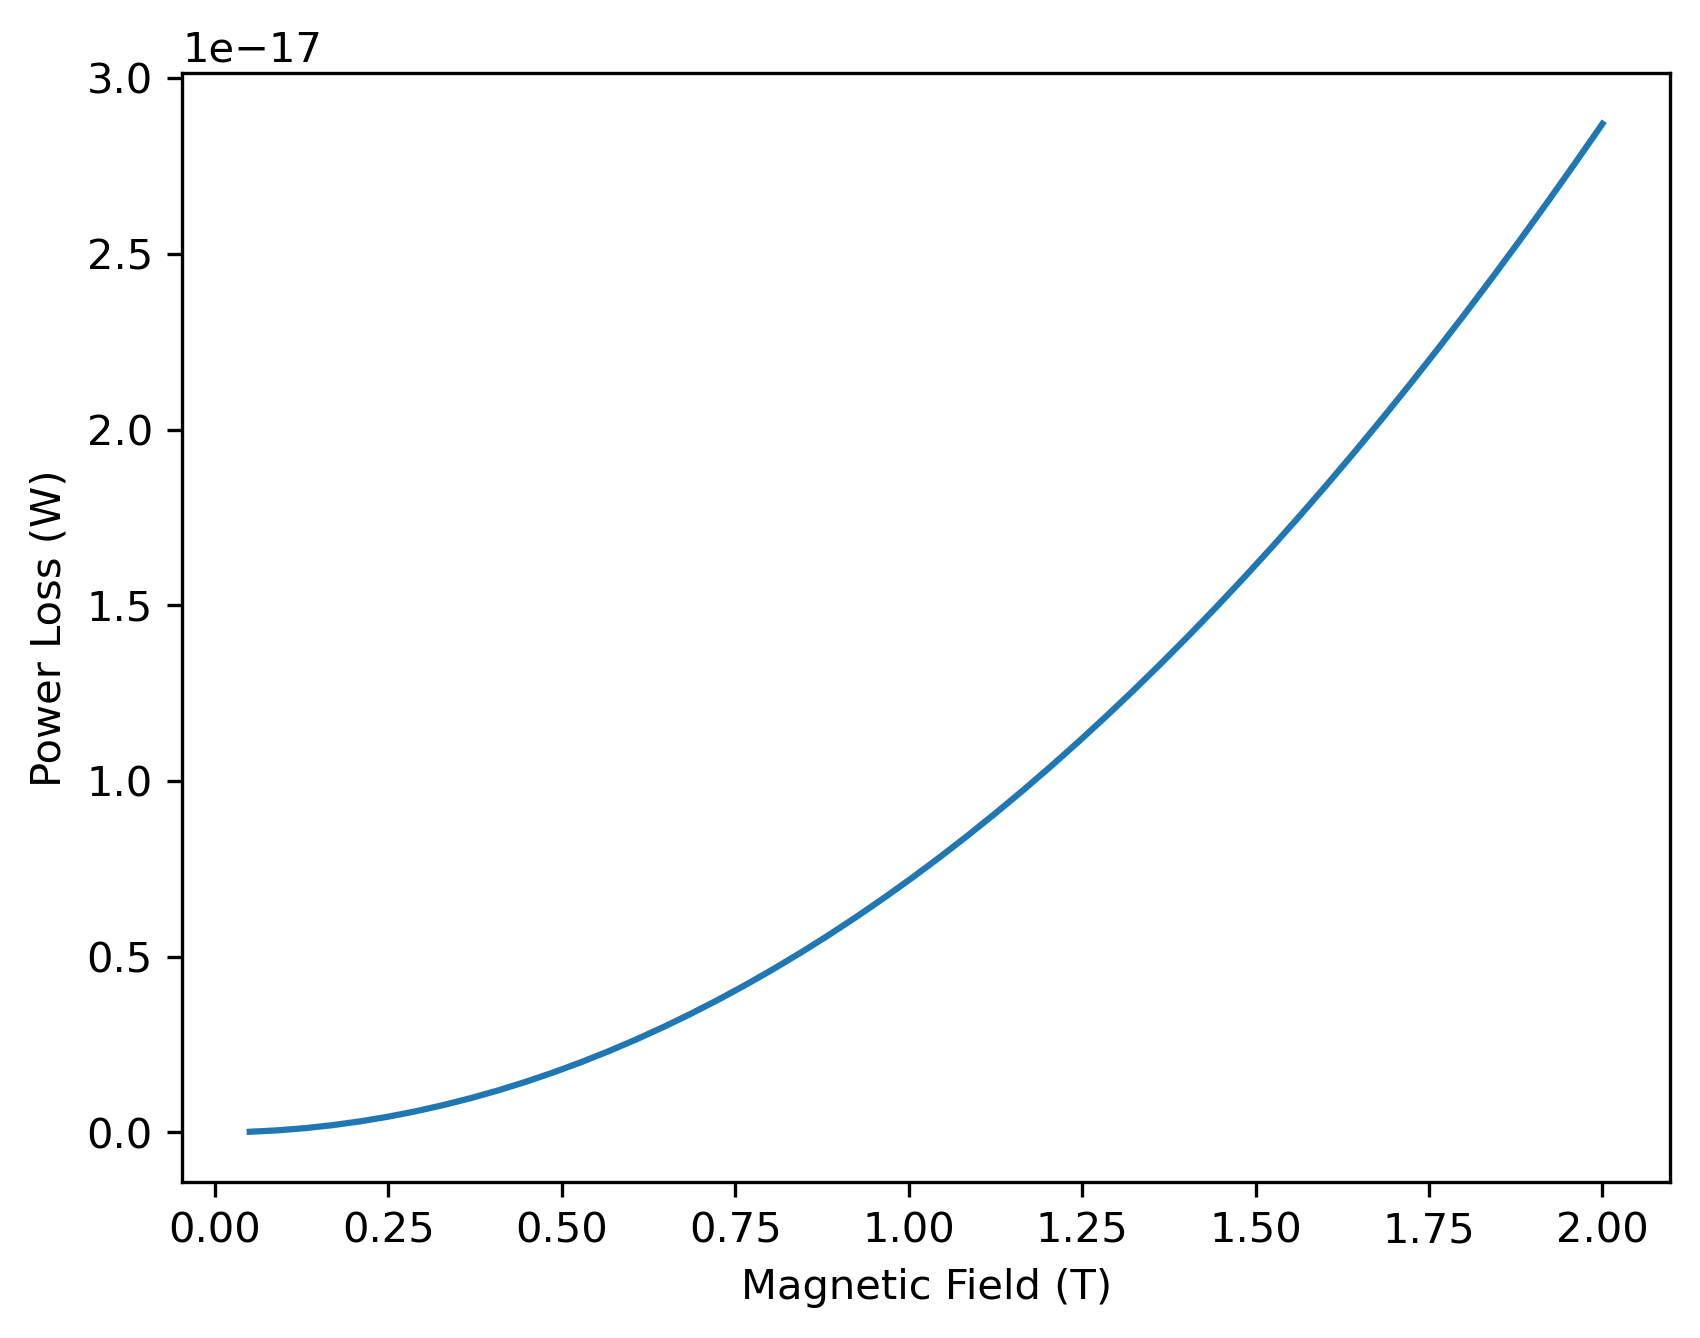

In [18]:
fig,ax = plt.subplots()

numBs=50
bArray=np.linspace(0.05,2,numBs)
ax.plot(bArray,getPower(bArray,getBetaFromT(T_end),math.pi/2))
ax.set_xlabel("Magnetic Field (T)")
ax.set_ylabel("Power Loss (W)")

In [19]:
print(getBetaFromT(T_end))

0.26252034953055364


In [20]:
def getCyclotronFreqTime(B,T,t,pitch=math.pi/2):
    """Function to return the cyclotron frequency emitted by an electron with kinetic energy T 
    in a magentic field B and time t.... assuming a given angle???

    Args:
        B: The magentic field in Tesla
        T: The kinetic energy in Joules
        t: Time in seconds
    Returns:
        The cylotron frequency, f_c, in Hz.

    """
    return ((scipy.constants.e*B)/(scipy.constants.m_e + T/(scipy.constants.c**2)))*(1+getPower(B,getBetaFromT(T),pitch)*t/(scipy.constants.m_e*scipy.constants.c**2 + T))/(2*np.pi)



2.9758828799916e-15
At time  0.0  f= 27010694055.736893 Hz
At time  0.001  f= 27010696340.105556 Hz
Frequency slope is  2284368.663787842 Hz /s


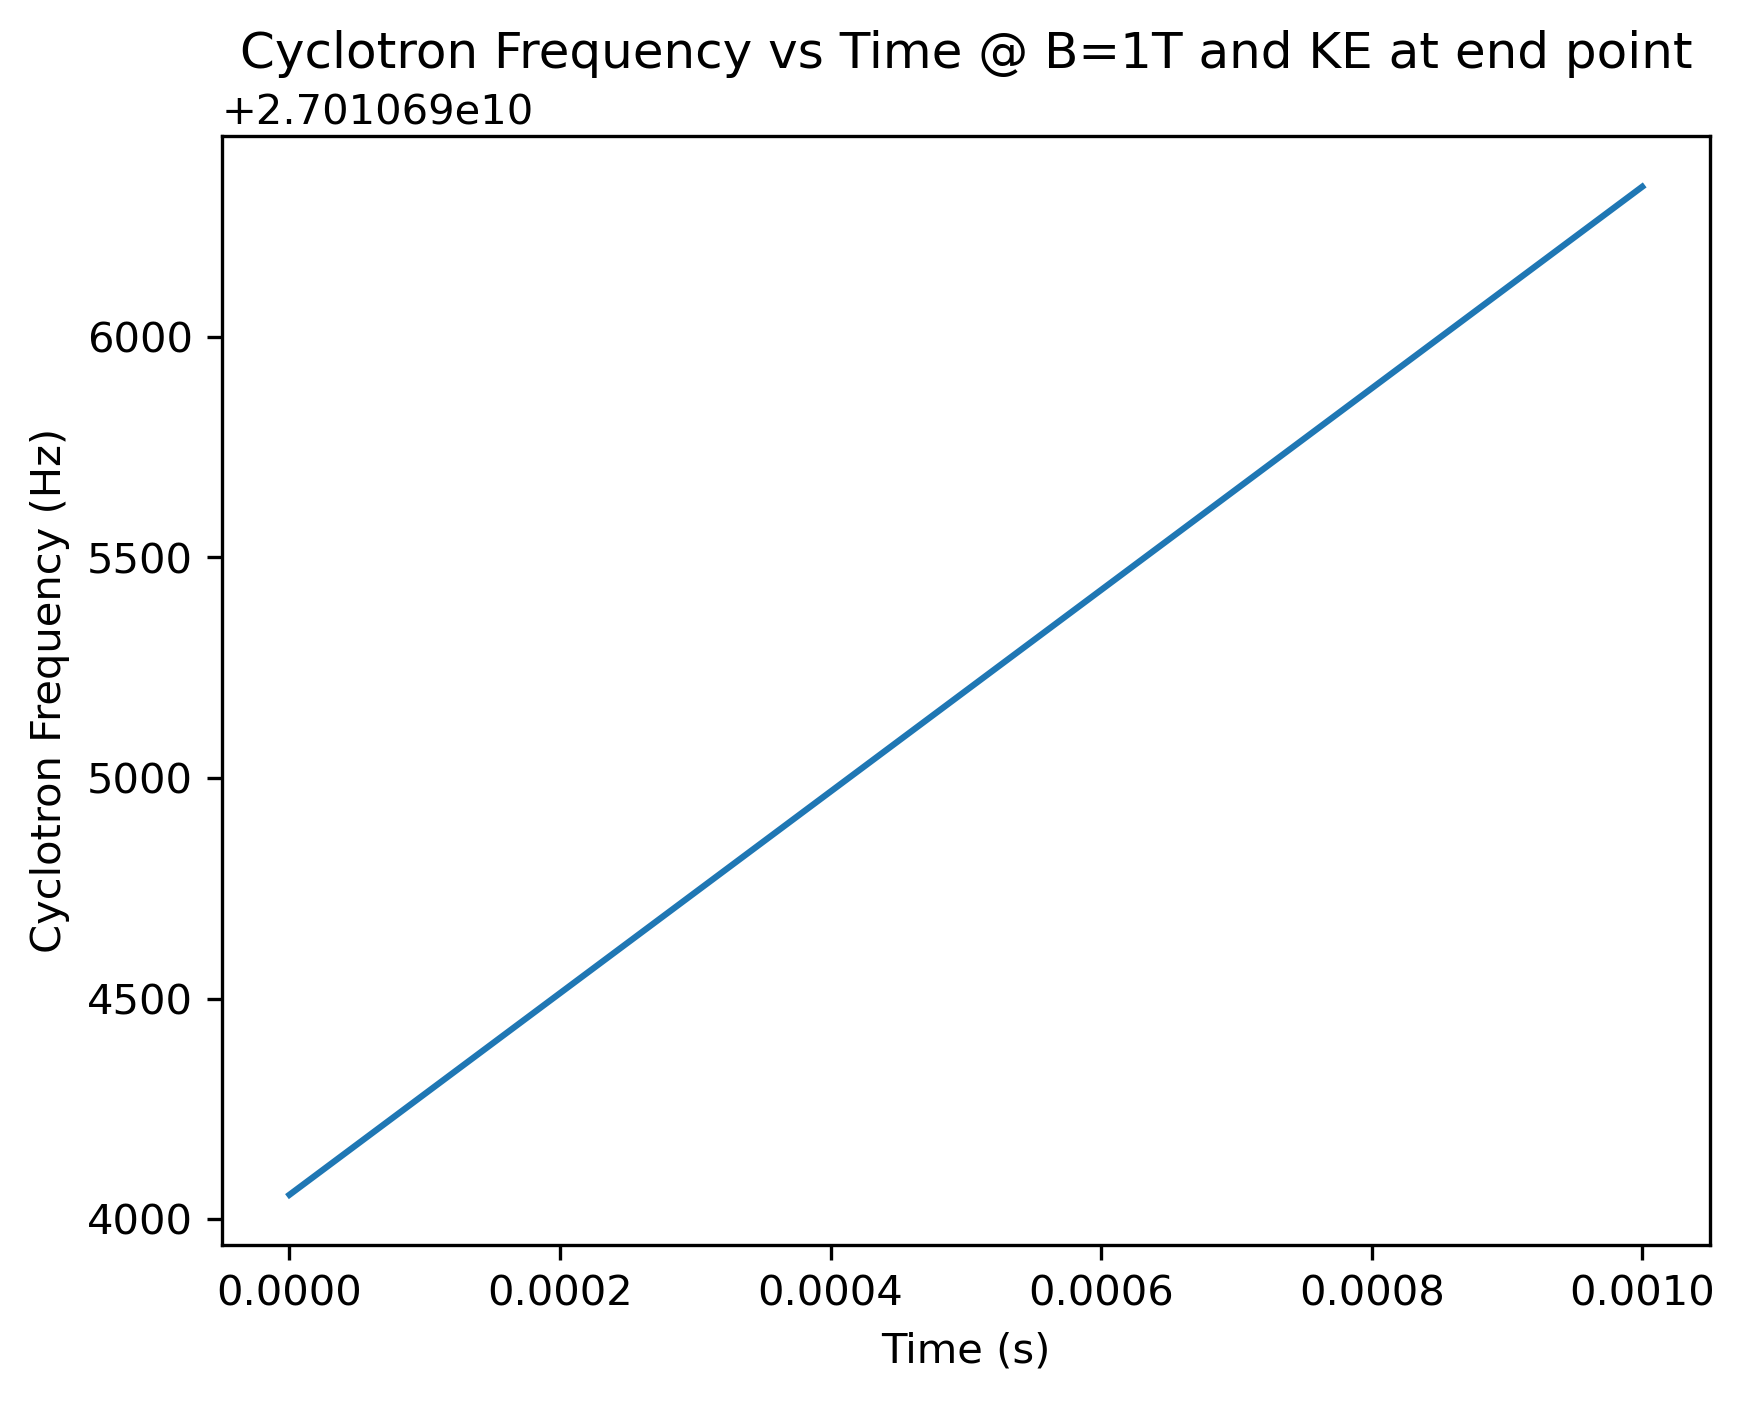

In [21]:
print(T_end)
fig,ax = plt.subplots()
tArray=np.linspace(0,1e-3,100)
fArray=getCyclotronFreqTime(1,T_end,tArray)
ax.plot(tArray,fArray)
#ax.plot(tArray,(T_end-getPower(1,getBetaFromT(T_end),math.pi/2)*tArray)/scipy.constants.e)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cyclotron Frequency (Hz)")
ax.set_title("Cyclotron Frequency vs Time @ B=1T and KE at end point")

print("At time ",tArray[0]," f=",fArray[0],"Hz")
print("At time ",tArray[99]," f=",fArray[99],"Hz")
freqSlope=(fArray[99]-fArray[0])/(tArray[99]-tArray[0])
initialFreq=fArray[0]
print("Frequency slope is ",freqSlope, "Hz /s")


## Modeling signal as a chirp

The above plot shows that the frequency of the cylotron signal changes linearly with time (excluding stochastic energy loss). That is if our initial frequency if $f_0$ then after some time $t$ we will have a frequency $$f(t) = f_0 + c * t$$
where $c = \frac{f_1 -f_0}{T}$ where $f_1$ is the frequency we reach after time $T$

The phase as a function of time is just given by
$$ \phi (t) = \phi_0 + 2 \pi \int_0^t f(\tau) d\tau$$
so
$$ \phi (t) = \phi_0 + 2 \pi \int_0^t \left(f_0 + c \tau \right) d\tau$$

$$ \phi (t) = \phi_0 + 2 \pi \left( f_0 \tau + \frac{c \tau^2}{2} \right) $$

So the equation for a chirp is
$$ x(t) = \sin \left[\phi_0 + 2 \pi \left( f_0 \tau + \frac{c \tau^2}{2} \right)\right] $$


In [22]:
def chirpSignal(t,c,f0,phi0=0):
    """Function to return the chirp signal as a function of time t

    Args:
        f0: The initial frequency
        phi0: The initial phase
        c: The frequency slope of the chirp in Hz/s
        t: Time in seconds
    Returns:
        The value of the chirp at time t
    """
    return np.sin(phi0 + 2*math.pi*(f0*t + 0.5*c*t**2))

    
    

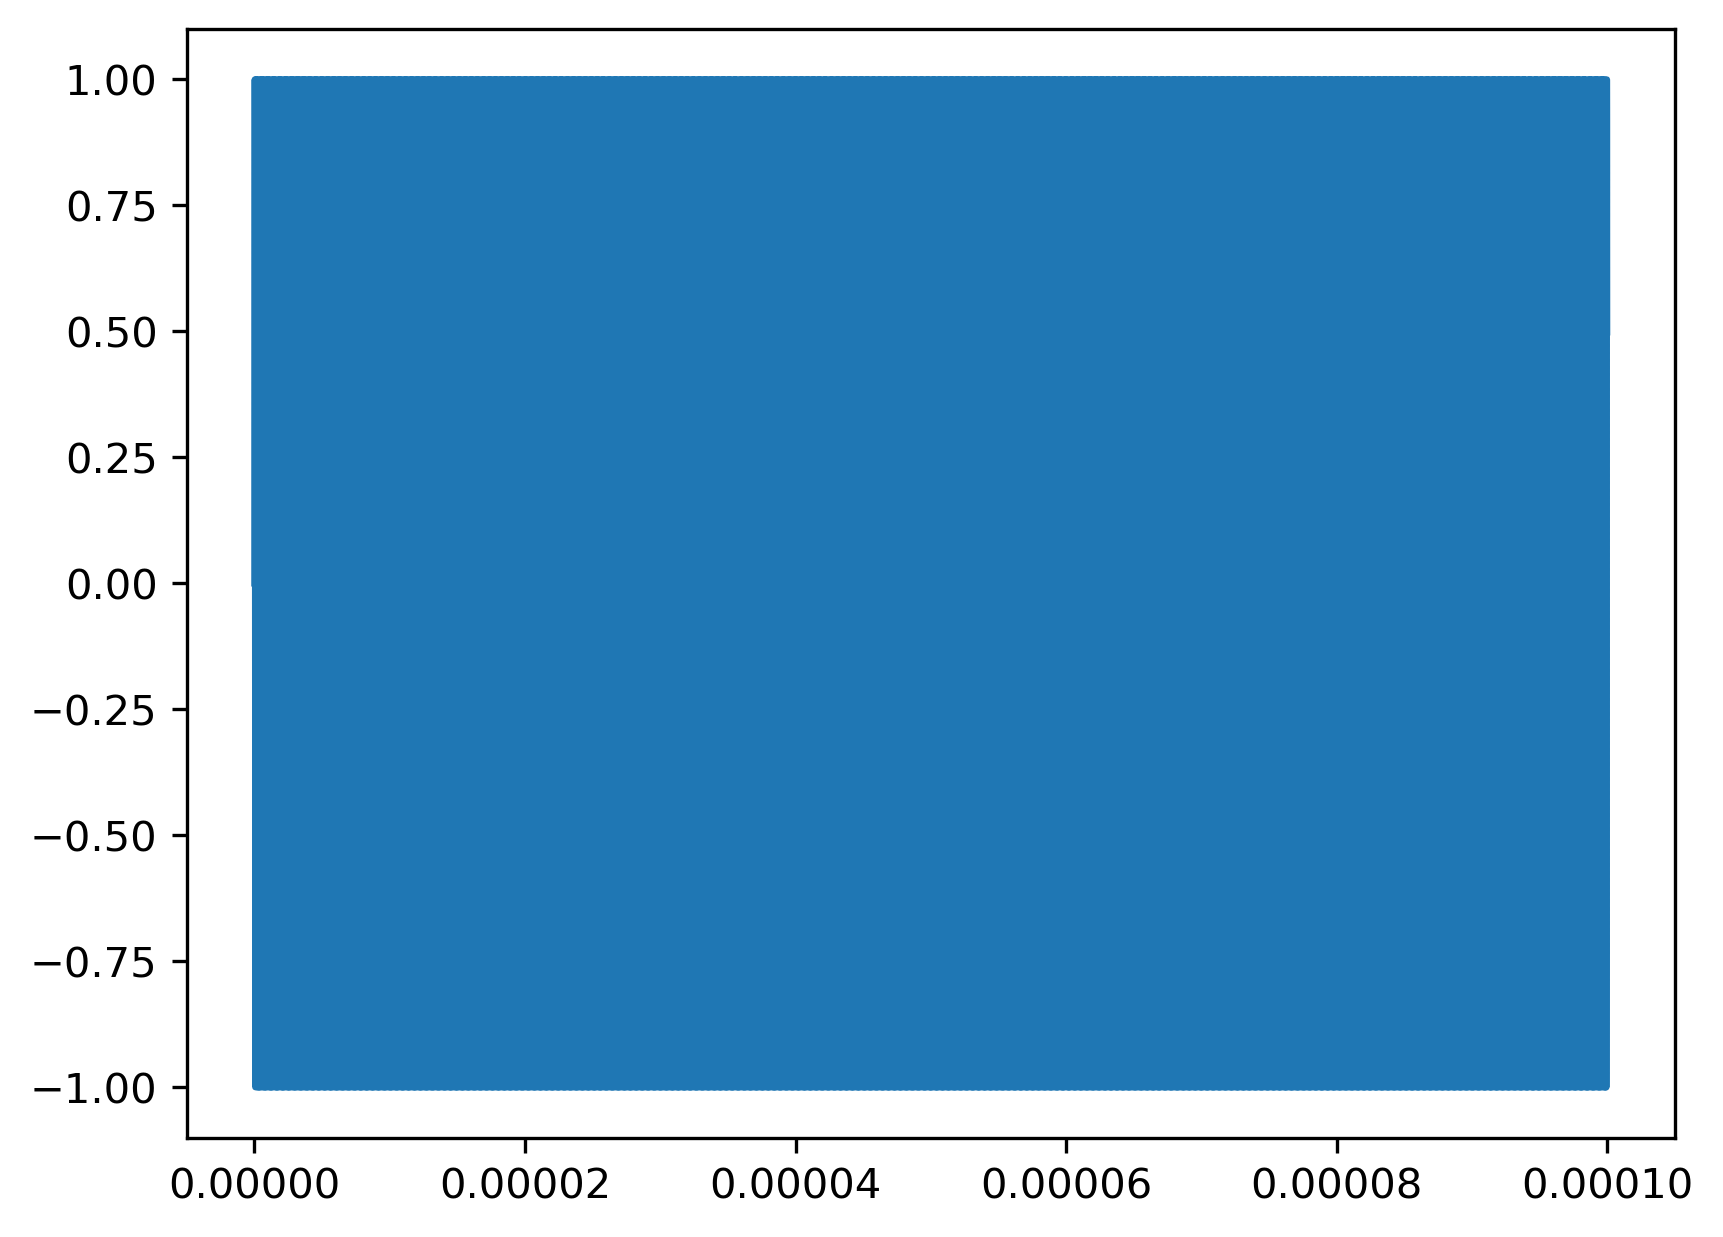

In [23]:
tArray=np.linspace(0,1e-4,100000)
fig,ax = plt.subplots()
ax.plot(tArray,chirpSignal(tArray,freqSlope,initialFreq))
v=chirpSignal(tArray,freqSlope,initialFreq)

In [24]:
from scipy.fft import fft, ifft  # Import the fft and inverse fft functions
dt=tArray[1]-tArray[0]
N=len(tArray)
yf = fft(v) #FFT of v
df=1/(N*dt)  # Frequency spacing
fs=1/dt
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2)  #The N/2 frequency values from 0 to 1/(2*dt)

Text(0, 0.5, 'Magnitude (arb.)')

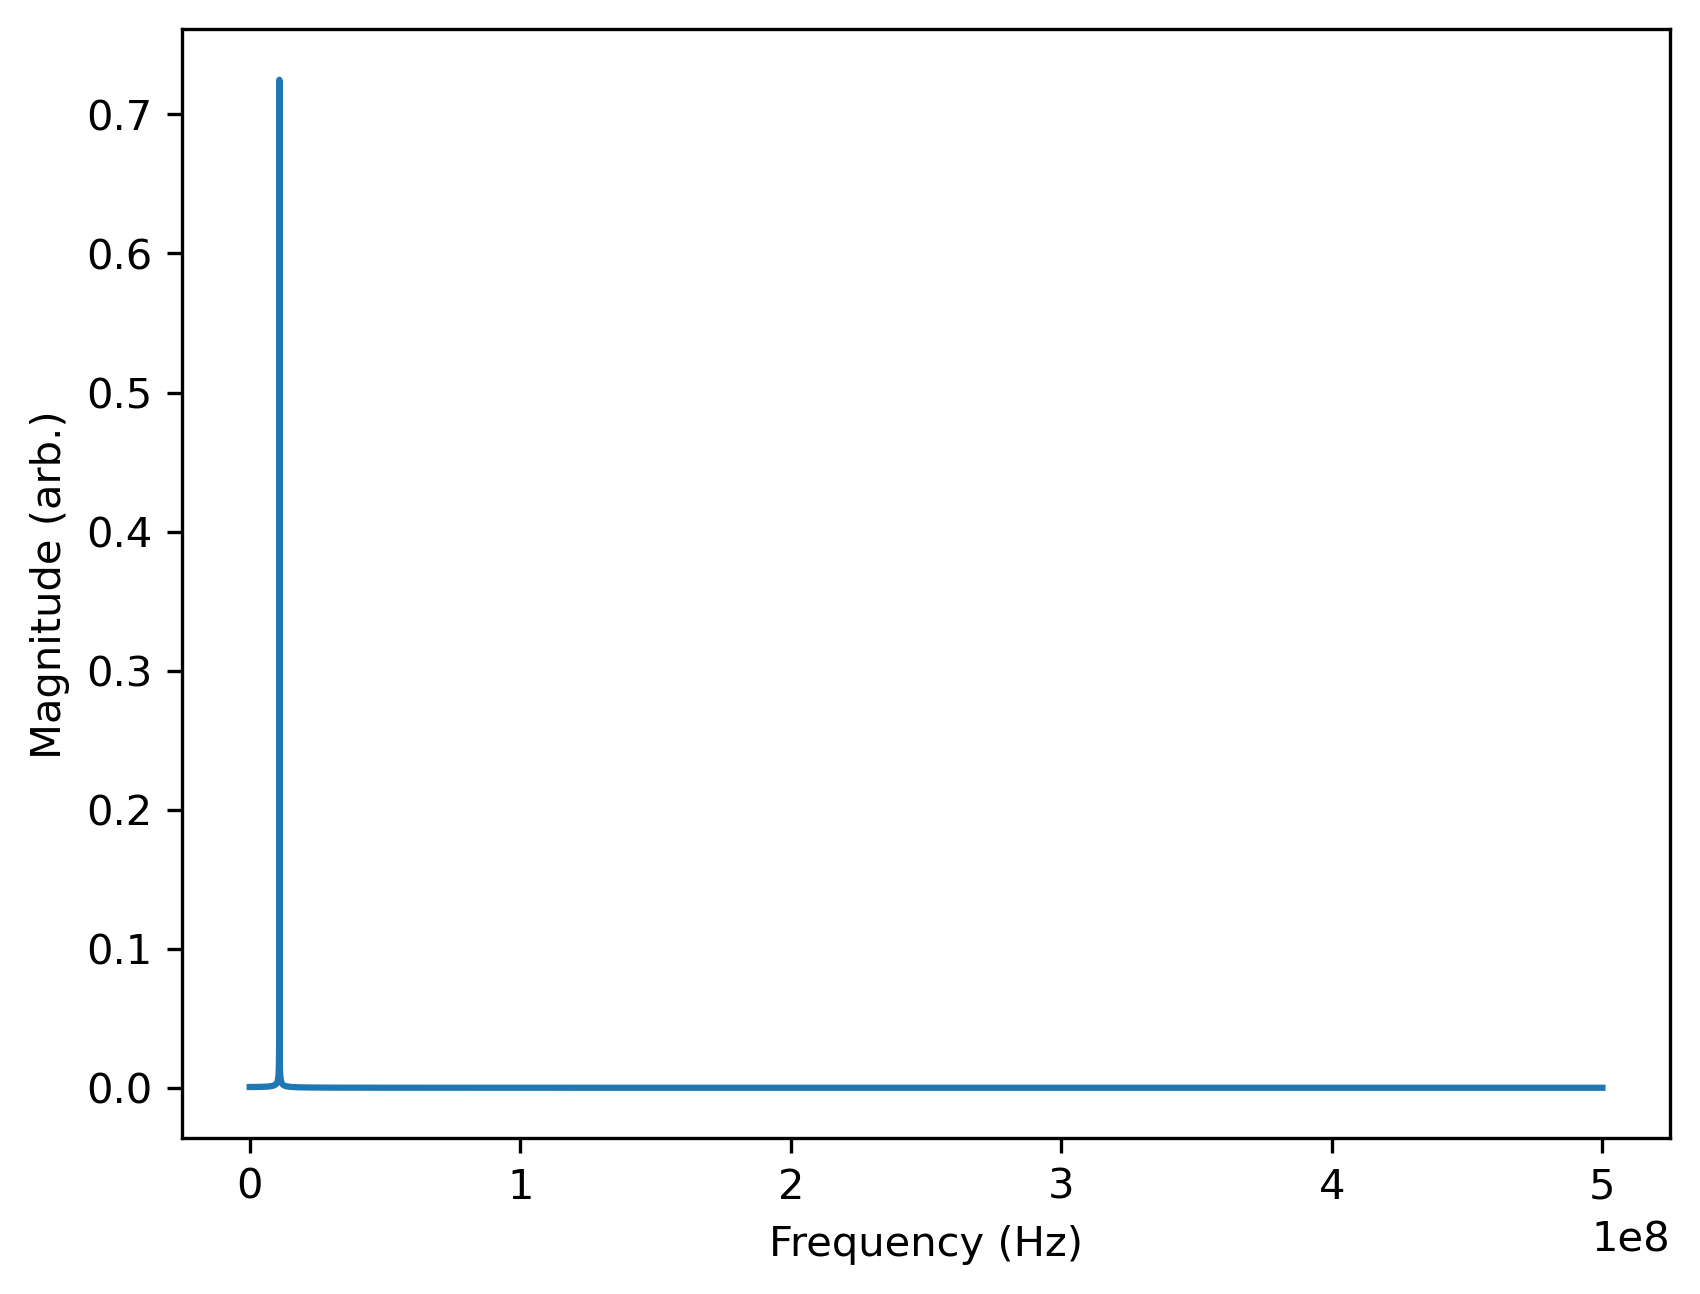

In [25]:
fig,ax = plt.subplots()
ax.plot(xf,convertToMag(yf))
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Magnitude (arb.)")

(501,) (100,) (501, 100)


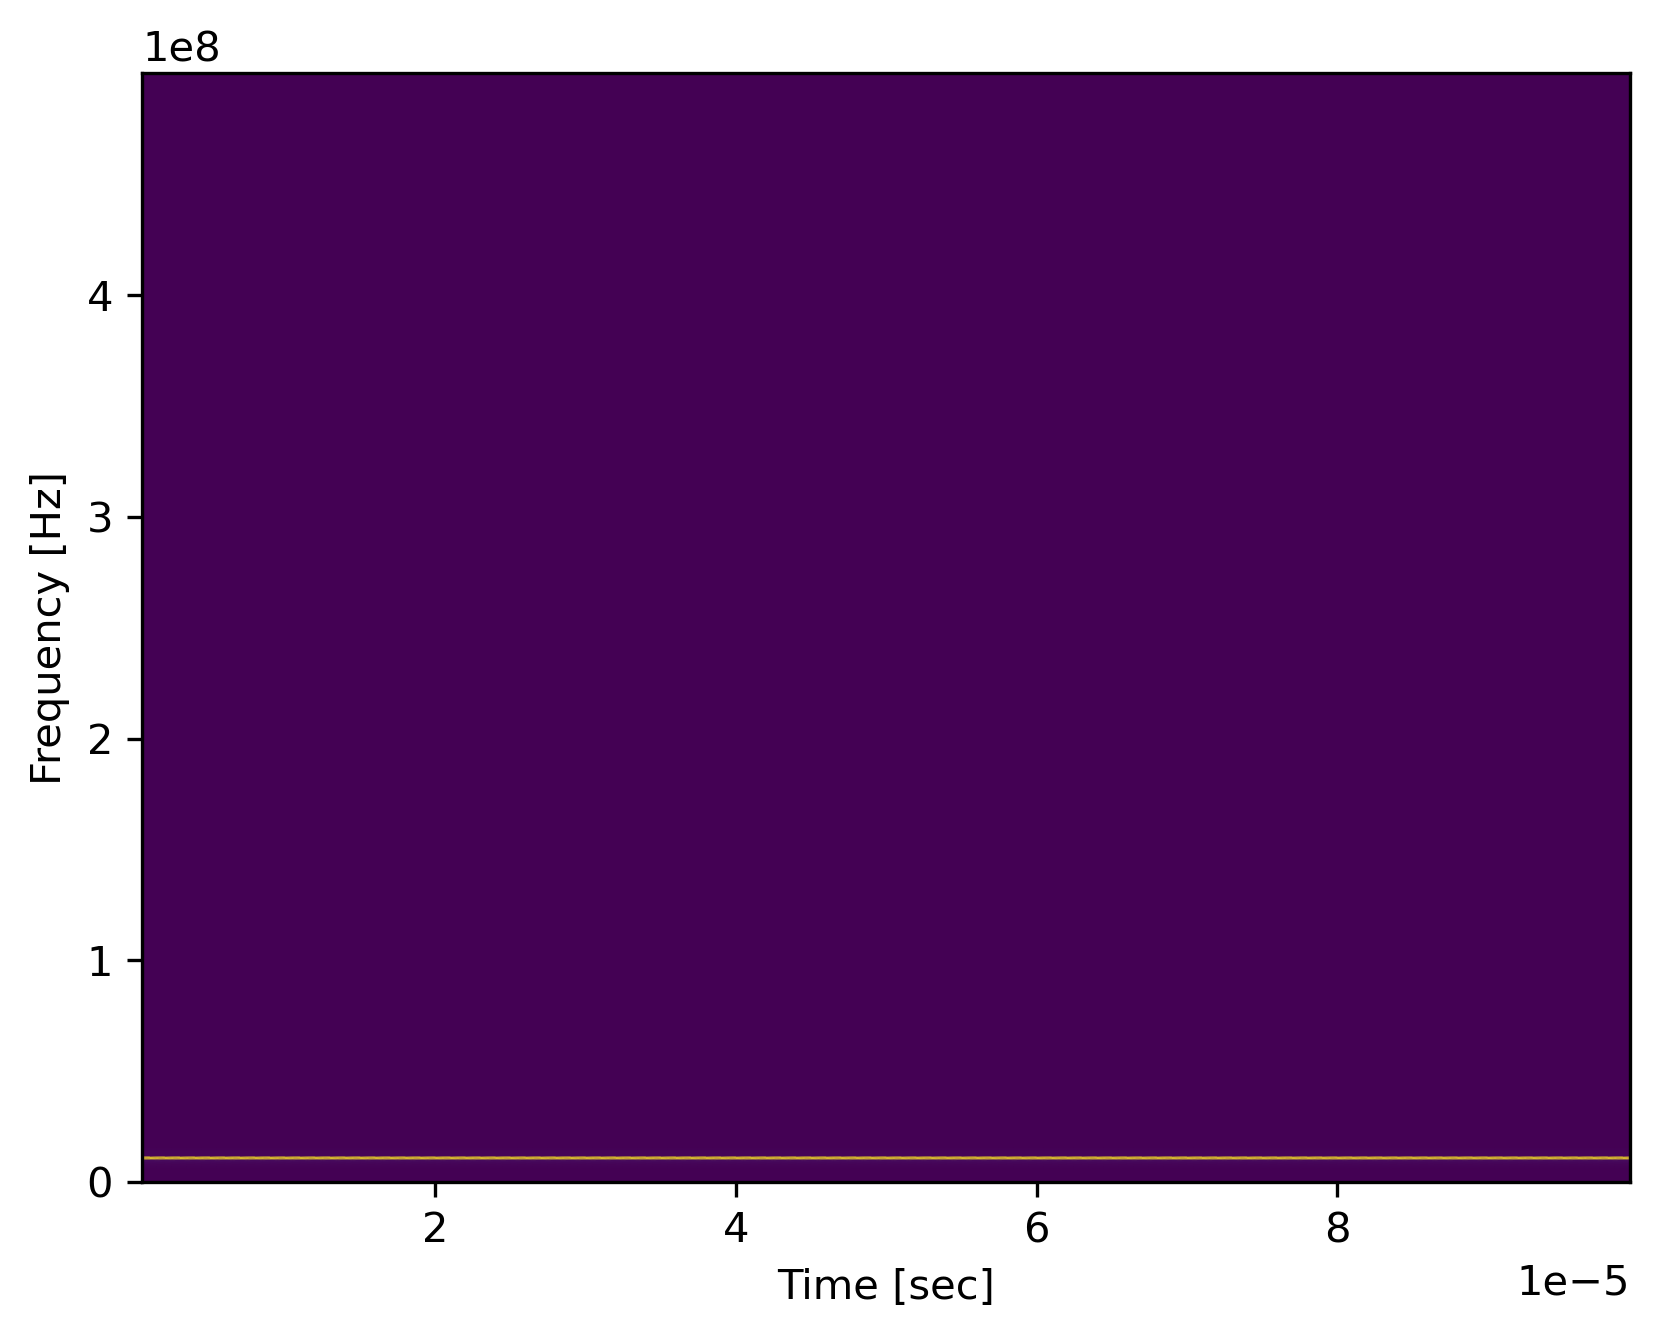

In [26]:
from scipy import signal
f, t, Sxx = signal.spectrogram(v, fs,nperseg=1000,noverlap=0)
print(f.shape,t.shape,Sxx.shape)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()